# The 12 Different Types of Kagglers 

They say people are not averages. They also say you can drown in a pool who's average depth is 12 cm.   
In this script we try to move a little past "the average kaggler" and present "the 12 typical kagglers". 
These are 12 imagined people that represent the kaggle community hopefully better than that of a single average kaggler.  
This will be analogous to the following: instead of talking about "the pool's average depth is 12cm" move on to talk about "95% of the pool's area is 2 cm deep on average, and 5% of the pool's area is 2 meters deep on average".  

This dataset holds the 2017 kaggle data science survay results. It is presented to us here in a very raw and unprocessed form (to say the least), so we'll first need to move quite a bit of data around before we can continue.  

After a little bit of pre-processing we will look at correlations between several key data fields, and then continue to cluster analyize the ~16,000 kagglers that have answered this survey.

**In the final and main** part of the script, we present a short summery paragraph of each kaggler type one by one. 

# The TL;DR Version:
To see where these descriptions come from, please continue to the analysis

### Paragraph Summery of Kaggler Type no. 1:
The most frequent kaggler (accounts for slightly less than 15% of kagglers) is a 28 year old male from India, he is employed full-time as a Software Developer or a Data Scientist, he has some industry experience, he majored in Computer Science (CS) during University and holds a Master's degree. His annual salary is about 14K dollars a year. He is looking forward to learn about deep learning in the upcoming year and specifically using tensorflow.

### Paragraph Summery of Kaggler Type no. 2:
The 2nd most frequent kaggler (accounts for slightly less than 13% of kagglers) is a 27 year old male from India, he is employed full-time as a Software Developer, has little industry experience, he has majored in CS during university and holds a Bachelor's degree.

### Paragraph Summery of Kaggler Type no. 3:
The 3rd most frequent kaggler (accounts for about 11% of kagglers) is a 34 year old male from the US, he is employed full-time, and doesn't really have the time to fill out an internet survey.

### Paragraph Summery of Kaggler Type no. 4:
The 4th most frequent kaggler (accounts for about 9% of kagglers) is a 29 year old female from the US, she is employed full-time as a Data Scientist, has 3-5 years of industry experience, her background is CS and she holds a Master's degree. She didn't share her salary but we can infer from her background that she's not starving.

### Paragraph Summery of Kaggler Type no. 5:
The 5th most frequent kaggler (accounts for about 8.5% of kagglers) is a 30 year old male from the US, he is employed full-time as a Data Scientist, has 3-5 years of industry experience and holds a Master's degree in Mathematics/Statistics. He mainly works with python. His anual salary is 92K dollars. Next year, he wants to learn more about deep learning and specifically using tensorflow.

### Paragraph Summery of Kaggler Type no. 6:
The 6th most frequent kaggler (accounts for about 8.5% of kagglers) is a 22 year old male from the India, he is not employed, has no experience, he holds a Bachelor's degree majoring in CS. He mainly works with python. He spends 2-10 hours each week learning Data Science. His first exposure to data science was at online courses and he values kaggle competitions very highly as a potential credential.

### Paragraph Summery of Kaggler Type no. 7:
The 7th most frequent kaggler (accounts for about 8% of kagglers) is a 44 year old male from the US, he is employed full time at various different professions, has more than 10 years of experience, holds a Master's degree and majored in CS. His first training is University (they didn't have online courses 20 years ago...). He mainly works with python. He too is looking forward to gaining experience with deep learning and tensorflow in the upcoming year.

### Paragraph Summery of Kaggler Type no. 8:
The 8th most frequent kaggler (accounts for about 7.4% of kagglers) is a 34 year old male from around the world, he is employed full time as a Software Developer, but has no Data Science experience. he holds a Master's degree and majored in CS. His first Data Science training is coming from online courses and he spends 2-10 hours each week learning data science. He working with python and like everyone else he's also looking forward to gaining experience with deep learning in the upcoming year.

### Paragraph Summery of Kaggler Type no. 9:
The 9th most frequent kaggler (accounts for about 5.8% of kagglers) is a 30 year old male from around the world. He is not employed. He holds a Master's degree and comes from CS and Electrical Engineering (EE). His first Data Science training is coming from online courses and he spends most of his time learning Data Science. He working with a basic laptop and using python. Like everyone else he's also looking forward to learning about deep learning in the upcoming year.

### Paragraph Summery of Kaggler Type no. 10:
The 10th most frequent kaggler (accounts for about 5.6% of kagglers) is a 36 year old male from the US, he is employed full time and has more than 10 years of experience. He holds a Master's degree and comes from an eclectic background. He was first trained at University and is also self taught.

### Paragraph Summery of Kaggler Type no. 11:
The 11th most frequent kaggler (accounts for about 4.6% of kagglers) is a 40 year old male from the US, he is employed full-time as a Data Scientist, has more than 10 years of industry experience, his background is diverse (CS, EE, Math) and he holds a Master's degree. He self taught himself Data Science, and mainly works with python. His anual salary is 181K dollars. Like everyone else, this experienced kaggler wants to learn more about deep learning and specifically using tensorflow.

### Paragraph Summery of Kaggler Type no. 12:
The 12th most frequent and final kaggler (accounts for about 4% of kagglers) is a 26 year old female from the US. She is unemployed, has little industry experience, her background is diverse (CS, EE) and she holds either a Bachelor's or a Master's degree. She learns data science around 2-10 hours a week, and mainly works with python running her code on a basic laptop. Like everyone else, she is interested to learn more about deep learning in the upcoming year.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn import cluster, decomposition, preprocessing

# Load Data

In [2]:
#%% load data
multipleChoiceResponsesDF = pd.read_csv('../input/multipleChoiceResponses.csv', encoding='ISO-8859-1', low_memory=False)
processedDF = multipleChoiceResponsesDF.copy()
processedDF = processedDF.fillna(value='NaN')
allQuestions = processedDF.columns.tolist()

# Move data around and create a basic subset of numeric features


In [3]:
#%% create annual salary in US dollars feature
processedDF['CompensationAmount'] = processedDF['CompensationAmount'].str.replace(',','')
processedDF['CompensationAmount'] = processedDF['CompensationAmount'].str.replace('-','')
processedDF.loc[processedDF['CompensationAmount'] == 'NaN','CompensationAmount'] = '0'
processedDF.loc[processedDF['CompensationAmount'] == '','CompensationAmount'] = '0'
processedDF['CompensationAmount'] = processedDF['CompensationAmount'].astype(float)

conversionRates = pd.read_csv('../input/conversionRates.csv', encoding='ISO-8859-1').set_index('originCountry')
conversionRates = pd.read_csv('../input/conversionRates.csv').set_index('originCountry')
conversionRates.loc['USD']['exchangeRate']

exchangeRate = []
for row in range(processedDF.shape[0]):
    if processedDF.loc[row,'CompensationCurrency'] not in conversionRates.index.tolist():
        exchangeRate.append(1.0)
    else:
        exchangeRate.append(conversionRates.loc[processedDF.loc[row,'CompensationCurrency']]['exchangeRate'])
        
processedDF['exchangeRate'] = exchangeRate
processedDF['annualSalary_USD'] = processedDF['CompensationAmount']*processedDF['exchangeRate']

processedDF.loc[processedDF['annualSalary_USD'] > 300000, 'annualSalary_USD'] = 300000
processedDF['annualSalary_USD'] = processedDF['annualSalary_USD']/1000.0

In [4]:
#%% collect all basic features ('age','education level','seniority', 'salary', ...)
def GetDictValueForKey(x):
    return answerToNumericalDict[x]

basicFeatures = ['Country','GenderSelect','Age','FormalEducation','Tenure','annualSalary_USD','MajorSelect','EmploymentStatus','CurrentJobTitleSelect','LanguageRecommendationSelect','TimeSpentStudying']
basicSubsetDF = processedDF[basicFeatures]

additionalFeatures = ['FirstTrainingSelect','ProveKnowledgeSelect','AlgorithmUnderstandingLevel','MLMethodNextYearSelect','MLToolNextYearSelect','HardwarePersonalProjectsSelect','JobSearchResource','EmployerSearchMethod']
additionalSubsetDF = processedDF[additionalFeatures]

# add impatience variables that counts the number of NaNs in a given row for the basic and additional subsets
def CountNaNs(row):
    return (row == 'NaN').sum()

basicSubsetDF['impatience_basic'] = basicSubsetDF.apply(CountNaNs,axis=1)
basicSubsetDF['impatience_additional'] = additionalSubsetDF.apply(CountNaNs,axis=1)
basicSubsetDF['impatience'] = basicSubsetDF['impatience_basic'] + basicSubsetDF['impatience_additional']

# cap age to be in [15,85] range
basicSubsetDF.loc[basicSubsetDF['Age'] == 'NaN','Age'] = basicSubsetDF.loc[basicSubsetDF['Age'] != 'NaN','Age'].mean()
basicSubsetDF.loc[basicSubsetDF['Age'] <= 15,'Age'] = 15
basicSubsetDF.loc[basicSubsetDF['Age'] >= 85,'Age'] = 85

basicSubsetNumericDF = pd.DataFrame()
basicSubsetNumericDF['Age'] = basicSubsetDF['Age']

# transform formal education into an ordinal variable
answerToNumericalDict = {'I prefer not to answer': 10.0,
                         'NaN': 11.0,
                         'I did not complete any formal education past high school': 12.0,
                         'Professional degree': 14.0,
                         "Some college/university study without earning a bachelor's degree": 14.5,
                         "Bachelor's degree": 15.5,
                         "Master's degree": 18.0,
                         "Doctoral degree": 22.0}

basicSubsetNumericDF['Education_Years'] = basicSubsetDF['FormalEducation'].apply(GetDictValueForKey)

# transform tenure into an ordinal variable
answerToNumericalDict = {"I don't write code to analyze data": -0.5,
                         'NaN': 0.0,
                         'Less than a year': 0.5,
                         '1 to 2 years': 1.5,
                         '3 to 5 years': 4.0,
                         '6 to 10 years': 8.0,
                         'More than 10 years': 12.0}

basicSubsetNumericDF['Experience_Years'] = basicSubsetDF['Tenure'].apply(GetDictValueForKey)

# anual salary
basicSubsetNumericDF['annualSalary_USD'] = basicSubsetDF['annualSalary_USD']

# gender to numerical 
answerToNumericalDict = {'Male': -1.0,
                         'NaN': 0.0,
                         'A different identity': 0.0,
                         'Non-binary, genderqueer, or gender non-conforming': 0.0,
                         'Female': 1.0}

basicSubsetNumericDF['Gender'] = basicSubsetDF['GenderSelect'].apply(GetDictValueForKey)

# transform time spent studying to ordinal
answerToNumericalDict = {'NaN': 0.0,
                         '0 - 1 hour': 0.5,
                         '2 - 10 hours': 6.0,
                         '11 - 39 hours': 25.0,
                         '40+': 45.0}

basicSubsetNumericDF['Study_Hours'] = basicSubsetDF['TimeSpentStudying'].apply(GetDictValueForKey)

# add impatience field
basicSubsetNumericDF['impatience'] = basicSubsetDF['impatience']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

In [5]:
basicSubsetNumericDF.head(15)

,Age,Education_Years,Experience_Years,annualSalary_USD,Gender,Study_Hours,impatience
0,32.3728,15.5,12.0,0.0000,0.0,0.0,6
1,30,18.0,0.5,0.0000,1.0,6.0,5
2,28,18.0,4.0,0.0000,-1.0,6.0,3
3,56,18.0,12.0,250.0000,-1.0,0.0,5
4,38,22.0,12.0,0.0000,-1.0,0.0,4
5,46,22.0,8.0,0.0000,-1.0,0.0,4
6,35,18.0,12.0,0.0000,-1.0,0.0,4
7,22,15.5,1.5,0.0000,1.0,0.5,2
8,43,15.5,4.0,64.1848,1.0,0.0,5
9,33,15.5,1.5,20.8824,-1.0,0.0,4


You can unhide the above code to see the mapping of the different features. In short, I've replaced 'NaN' ages with average age, I've tranformed the educations and expreience from string format to approximate number of years. The annual salary is converted based on the provided country exchange rate and presented in units of thousands of dollars per year. For gender, +1 is female, -1 is male, 0 is other. The Impaitiance column is the number of NaN fields in the row for the most basic questions (we will see exactly what they are in the future).   
I would like to take this opportunity to thank [I Coder](https://www.kaggle.com/ash316), I stole a few pieces of code from his script regarding the salary calculation.

# Show the correlation matrix of these features

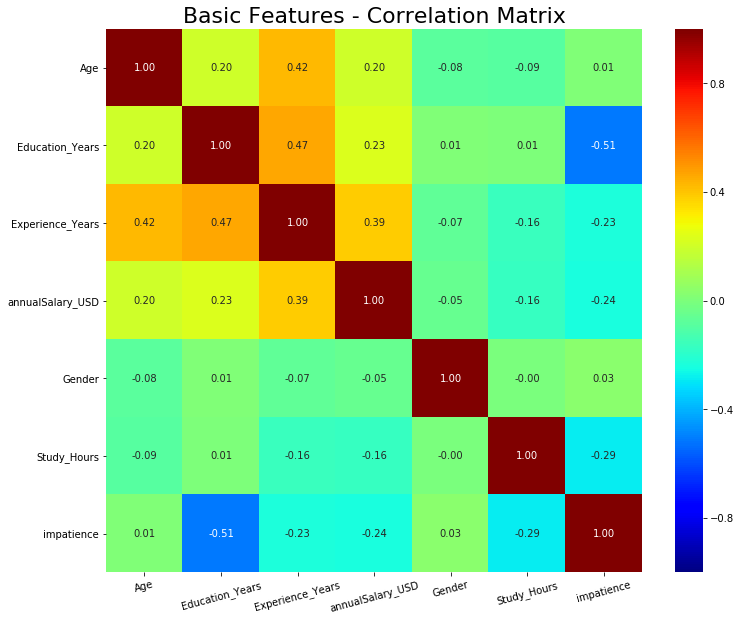

In [6]:
#%% show correlations between the most basic feature
basicSubsetNoisyNumericDF = basicSubsetNumericDF.copy()
basicSubsetNoisyNumericDF['Age'] = basicSubsetNoisyNumericDF['Age'].astype(float)
plt.figure(figsize=(12,10)); plt.title('Basic Features - Correlation Matrix', fontsize=22)
sns.heatmap(basicSubsetNoisyNumericDF.corr(), vmin=-1, vmax=1, fmt='.2f', annot=True, cmap='jet'); 
plt.yticks(rotation=0); plt.xticks(rotation=15);

We can see that 'education', 'expreience', 'salary' and 'age' are positivley correlated, as one would expect. We can see that the gender is not correlated with anything, indicating no clear gender bias for the women that do enter the field of data science, which is a good sign.  

And we can see an interesting negative correlation between 'impatiance' and 'education' (and also between  'impatiance' and 'expreience' and 'salary'.  
Even though I would love to write something like "impatiant people are less educated and earn less", but the truth is that this is mainly the result of my descision to fill 'NaN's in the 'education', 'experience', and 'salary' fields as low numeric values.

# Show the pairwise scatter plots of the basic features

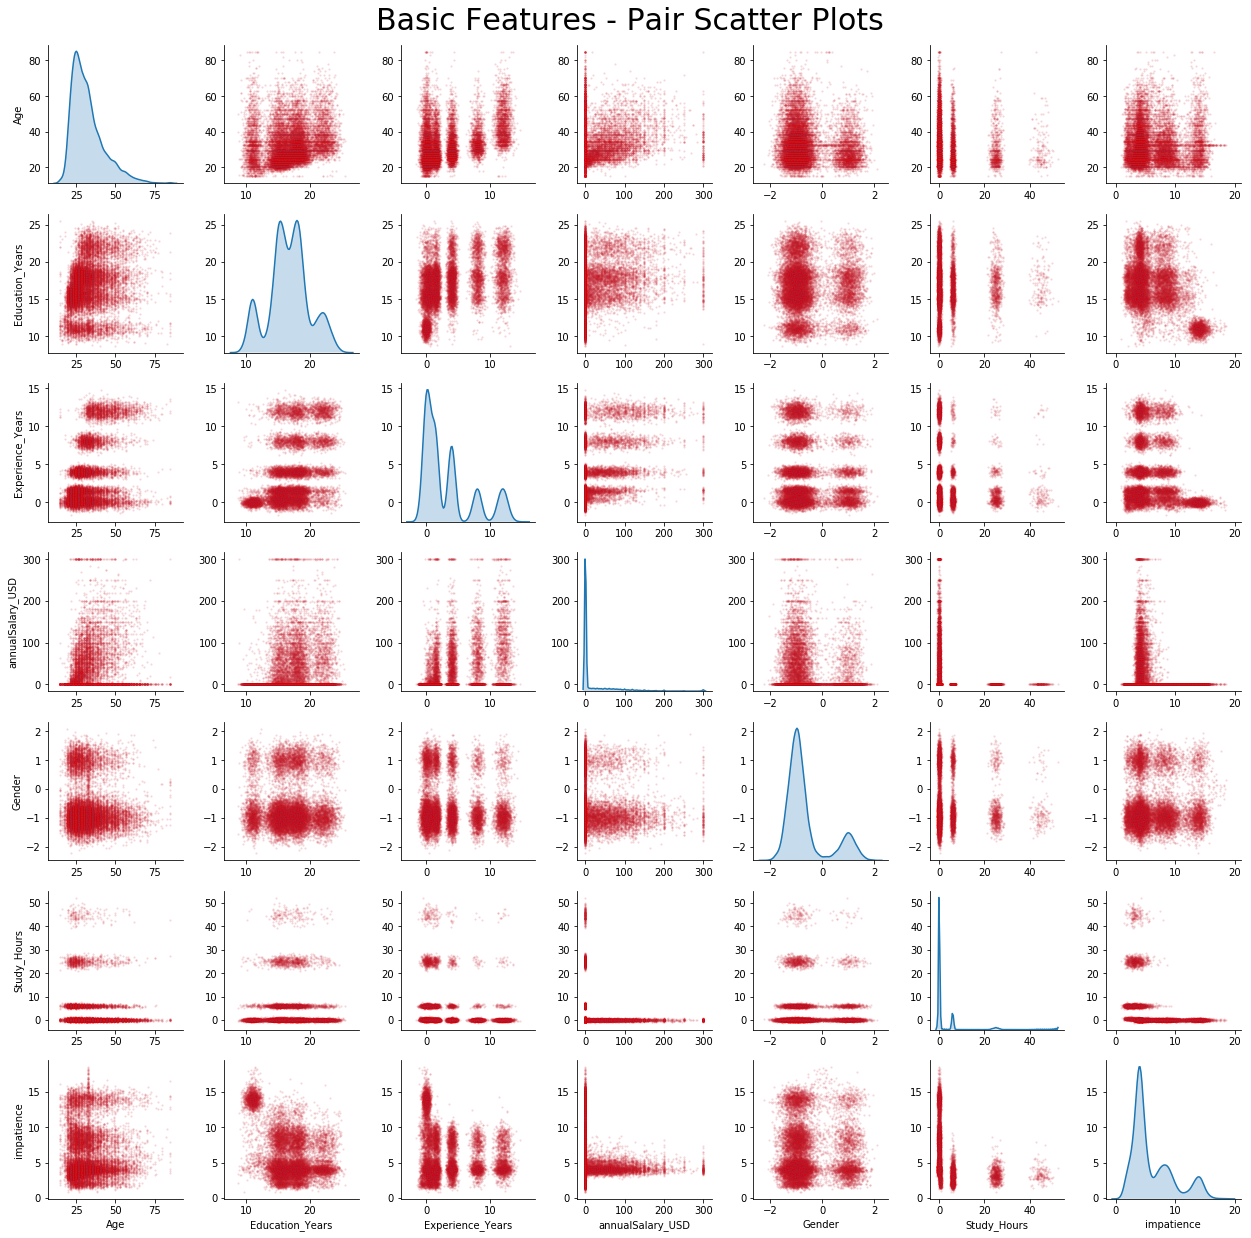

In [7]:
for col in ['impatience','Gender','Education_Years','Experience_Years','Study_Hours']:
    basicSubsetNoisyNumericDF[col] *= (1.0 + 0.05*np.random.randn(basicSubsetNoisyNumericDF.shape[0]))
    basicSubsetNoisyNumericDF[col] += 0.3*np.random.randn(basicSubsetNoisyNumericDF.shape[0])

g = sns.pairplot(basicSubsetNoisyNumericDF, diag_kind="kde", plot_kws=dict(s=2, edgecolor="r", alpha=0.1), diag_kws=dict(shade=True));
g.fig.subplots_adjust(top=0.95);
g.fig.suptitle('Basic Features - Pair Scatter Plots', fontsize=30);

I've added a little bit of noise to the variables that have a small amount of unique values to get a better feel for the relative amounts.  

# Continue with Data Cleaning - One Hot encode Categoricals

In [8]:
#%% apply whitening on each of the basic numeric features we've seen so far
scaledBasicSubset = preprocessing.StandardScaler().fit_transform(basicSubsetNumericDF.values);
numericDF = pd.DataFrame(scaledBasicSubset,columns=basicSubsetNumericDF.columns);

#%% apply one hot encoding to all other features and add it to our numeric dataframe
listOfColsToOneHotEncode = ['Country','MajorSelect','EmploymentStatus','CurrentJobTitleSelect',
                            'LanguageRecommendationSelect','FirstTrainingSelect','ProveKnowledgeSelect',
                            'AlgorithmUnderstandingLevel','MLMethodNextYearSelect','MLToolNextYearSelect',
                            'HardwarePersonalProjectsSelect','JobSearchResource','EmployerSearchMethod']

for col in listOfColsToOneHotEncode:
    labelEncoder = preprocessing.LabelEncoder()
    labelTfromed = labelEncoder.fit_transform(processedDF[col])
    oneHotEncoder = preprocessing.OneHotEncoder()
    oneHotTformed = oneHotEncoder.fit_transform(labelTfromed.reshape(-1,1))
    currOneHotDF = pd.DataFrame(oneHotTformed.todense(), columns = [col+'_OneHot_'+str(x) for x in range(len(labelEncoder.classes_))])
    numericDF = pd.concat((numericDF,currOneHotDF),axis=1)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Move on to the "Learning Platform Usefulness" Questions
We first convert the string answers to numeric ordinal values and then apply dimentinality reduction using PCA

In [9]:
#%% add learning platform usefulness features to our numeric dataframe
def GetDictValueForKey(x):
    return answerToNumericalDict[x]

allLearningPlatformColumns = [q for q in allQuestions if q.find('LearningPlatformUsefulness') >= 0]
answerToNumericalDict = {'Not Useful':-1.0,'NaN':0.0,'Somewhat useful':1.0,'Very useful':2.0}

learningUsefulnessOrigDF = processedDF.loc[:,allLearningPlatformColumns]
learningUsefulnessOrigDF = learningUsefulnessOrigDF.applymap(GetDictValueForKey)

# compress cols to eliminate outliers and apply whitening using PCA
numComponents = 12
learningUsefulnessPCAModel = decomposition.PCA(n_components=numComponents,whiten=True)
learningUsefulnessFeatures = learningUsefulnessPCAModel.fit_transform(learningUsefulnessOrigDF)

explainedVarVec = learningUsefulnessPCAModel.explained_variance_ratio_
print('Total explained percent by PCA model with %d components is %.1f%s' %(numComponents, 100*explainedVarVec.sum(),'%'))

newColNames = ['learning_PCA_%d'%(x+1) for x in range(numComponents)]
learningUsefulnessDF = pd.DataFrame(data=learningUsefulnessFeatures, columns=newColNames)

importanceWeight = 0.5
numericDF = pd.concat((numericDF, (importanceWeight/numComponents)*learningUsefulnessDF),axis=1)

Total explained percent by PCA model with 12 components is 89.7%


# Apply the same procedure on "Job Skill Importance" Questions

In [10]:
#%% add job skill imporance features to our numeric dataframe
allJobSkillColumns = [q for q in allQuestions if q.find('JobSkillImportance') >= 0] 
answerToNumericalDict = {'Unnecessary':-1.0,'NaN':0.0,'Nice to have':1.0,'Necessary':2.0}

jobSkillOrigDF = processedDF.loc[:,allJobSkillColumns]
jobSkillOrigDF = jobSkillOrigDF.applymap(GetDictValueForKey)

# compress cols to eliminate outliers and apply whitening using PCA
numComponents = 7
jobSkillPCAModel = decomposition.PCA(n_components=numComponents,whiten=True)
jobSkillFeatures = jobSkillPCAModel.fit_transform(jobSkillOrigDF)

explainedVarVec = jobSkillPCAModel.explained_variance_ratio_
print('Total explained percent by PCA model with %d components is %.1f%s' %(numComponents, 100*explainedVarVec.sum(),'%'))

newColNames = ['jobSkill_PCA_%d'%(x+1) for x in range(numComponents)]
jobSkillDF = pd.DataFrame(data=jobSkillFeatures, columns=newColNames)

importanceWeight = 0.5
numericDF = pd.concat((numericDF, (importanceWeight/numComponents)*jobSkillDF),axis=1)

Total explained percent by PCA model with 7 components is 91.1%


# Apply the same procedure on "Work Tools and Methods" Questions

In [11]:
#%% add work tools and methods frequency features to our dataframe
allWorkToolsColumns = [q for q in allQuestions if q.find('WorkToolsFrequency') >= 0] 
allWorkMethodsColumns = [q for q in allQuestions if q.find('WorkMethodsFrequency') >= 0] 
answerToNumericalDict = {'NaN':0.0,'Rarely':1.0,'Sometimes':2.0,'Often':3.0,'Most of the time':4.0}

workToolsOrigDF = processedDF.loc[:,allWorkToolsColumns+allWorkMethodsColumns]
workToolsOrigDF = workToolsOrigDF.applymap(GetDictValueForKey)

# compress cols to eliminate outliers and apply whitening using PCA
numComponents = 38
workToolsPCAModel = decomposition.PCA(n_components=numComponents,whiten=True)
workToolsFeatures = workToolsPCAModel.fit_transform(workToolsOrigDF)

explainedVarVec = workToolsPCAModel.explained_variance_ratio_
print('Total explained percent by PCA model with %d components is %.1f%s' %(numComponents, 100*explainedVarVec.sum(),'%'))

newColNames = ['workTools_PCA_%d'%(x+1) for x in range(numComponents)]
workToolsDF = pd.DataFrame(data=workToolsFeatures, columns=newColNames)

importanceWeight = 0.5
numericDF = pd.concat((numericDF, (importanceWeight/numComponents)*workToolsDF),axis=1)

Total explained percent by PCA model with 38 components is 90.7%


# Apply the same procedure on "Work Challanges" Questions

In [12]:
#%% add work challanges features to our dataframe
allWorkChallengesColumns = [q for q in allQuestions if q.find('WorkChallengeFrequency') >= 0]
answerToNumericalDict = {'NaN':0.0,'Rarely':1.0,'Sometimes':2.0,'Often':3.0,'Most of the time':4.0}

workChallangesOrigDF = processedDF.loc[:,allWorkChallengesColumns]
workChallangesOrigDF = workChallangesOrigDF.applymap(GetDictValueForKey)

# compress cols to eliminate outliers and apply whitening using PCA
numComponents = 16
workChallengesPCAModel = decomposition.PCA(n_components=numComponents,whiten=True)
workChallengesFeatures = workChallengesPCAModel.fit_transform(workChallangesOrigDF)

explainedVarVec = workChallengesPCAModel.explained_variance_ratio_
print('Total explained percent by PCA model with %d components is %.1f%s' %(numComponents, 100*explainedVarVec.sum(),'%'))

newColNames = ['workChallenges_PCA_%d'%(x+1) for x in range(numComponents)]
workChallengesDF = pd.DataFrame(data=workChallengesFeatures, columns=newColNames)

importanceWeight = 0.5
numericDF = pd.concat((numericDF, (importanceWeight/numComponents)*workChallengesDF),axis=1)

Total explained percent by PCA model with 16 components is 90.3%


# Apply the same procedure on "Job Selection Factors" Questions

In [13]:
#%% add job selection factors features to our dataframe
allJobFactorsColumns = [q for q in allQuestions if q.find('JobFactor') >= 0] 
answerToNumericalDict = {'Not important':-1.0,'NaN':0.0,'Somewhat important':1.0,'Very Important':2.0}

jobPreferenceOrigDF = processedDF.loc[:,allJobFactorsColumns]
jobPreferenceOrigDF = jobPreferenceOrigDF.applymap(GetDictValueForKey)

# compress cols to eliminate outliers and apply whitening using PCA
numComponents = 10
jobPreferencePCAModel = decomposition.PCA(n_components=numComponents,whiten=True)
jobPreferenceFeatures = jobPreferencePCAModel.fit_transform(jobPreferenceOrigDF)

explainedVarVec = jobPreferencePCAModel.explained_variance_ratio_
print('Total explained percent by PCA model with %d components is %.1f%s' %(numComponents, 100*explainedVarVec.sum(),'%'))

newColNames = ['jobPreference_PCA_%d'%(x+1) for x in range(numComponents)]
jobPreferenceDF = pd.DataFrame(data=jobPreferenceFeatures, columns=newColNames)

importanceWeight = 0.5
numericDF = pd.concat((numericDF, (importanceWeight/numComponents)*jobPreferenceDF),axis=1)

Total explained percent by PCA model with 10 components is 90.8%


# Apply the same procedure on "Time Allocation" Questions

In [14]:
#%% add time allocation distribution features to our dataframe
def ReplaceOnlyNaNs(x):
    if x == 'NaN':
        return 0.0
    else:
        return x

allTimeAllocationColumns = ['TimeGatheringData', 'TimeModelBuilding', 'TimeProduction', 'TimeVisualizing', 'TimeFindingInsights', 'TimeOtherSelect']
timeAllocationOrigDF = processedDF.loc[:,allTimeAllocationColumns]
timeAllocationOrigDF = timeAllocationOrigDF.applymap(ReplaceOnlyNaNs)

numComponents = 4
timeAllocationPCAModel = decomposition.PCA(n_components=numComponents,whiten=True)
timeAllocationFeatures = timeAllocationPCAModel.fit_transform(timeAllocationOrigDF)

explainedVarVec = timeAllocationPCAModel.explained_variance_ratio_
print('Total explained percent by PCA model with %d components is %.1f%s' %(numComponents, 100*explainedVarVec.sum(),'%'))

newColNames = ['timeAllocation_PCA_%d'%(x+1) for x in range(numComponents)]
timeAllocationeDF = pd.DataFrame(data=timeAllocationFeatures, columns=newColNames)

importanceWeight = 0.5
numericDF = pd.concat((numericDF, (importanceWeight/numComponents)*jobPreferenceDF),axis=1)

Total explained percent by PCA model with 4 components is 88.9%


# We now Finally have a Numeric Reperesentation of the Dataset
On this representation we can apply kmeans to cluster the data.

In [15]:
numericDF.shape

(16716, 420)


# First, let's figure out how many clusters we should use?

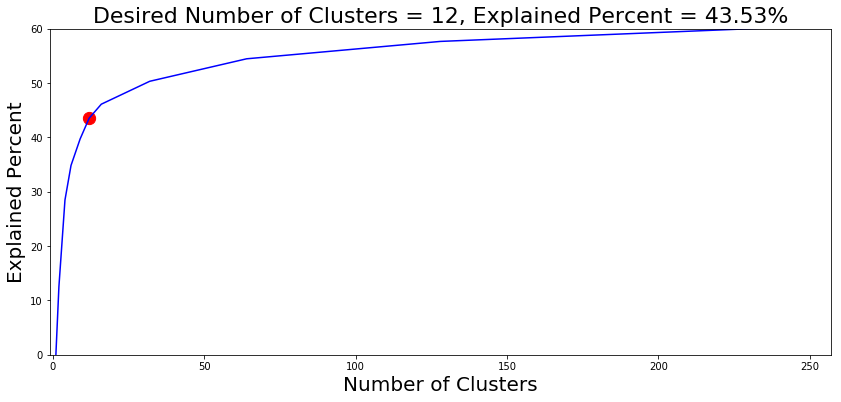

In [16]:
#%% we now finally have a numeric representation of the dataset and we are ready to cluster the users
listOfNumClusters = [1,2,4,6,9,12,16,32,64,128,256]
listOfInertia = []
for numClusters in listOfNumClusters:
    KMeansModel = cluster.MiniBatchKMeans(n_clusters=numClusters, batch_size=2100, n_init=5, random_state=1)
    KMeansModel.fit(numericDF)
    listOfInertia.append(KMeansModel.inertia_)
explainedPercent = 100*(1-(np.array(listOfInertia)/listOfInertia[0]))

# plot the explained percent as a function of number of clusters
percentExplainedTarget = 40

numDesiredClusterInd = np.nonzero(explainedPercent > percentExplainedTarget)[0][0]
numDesiredClusters = listOfNumClusters[numDesiredClusterInd]

explainedPercentReached = explainedPercent[numDesiredClusterInd]
plt.figure(figsize=(14,6)); plt.plot(listOfNumClusters,explainedPercent,c='b')
plt.scatter(numDesiredClusters,explainedPercentReached,s=150,c='r')
plt.xlabel('Number of Clusters', fontsize=20); plt.ylabel('Explained Percent', fontsize=20)
plt.title('Desired Number of Clusters = %d, Explained Percent = %.2f%s' %(numDesiredClusters,explainedPercentReached,'%'),fontsize=22);
plt.xlim(-1,listOfNumClusters[-1]+1); plt.ylim(0,60);

We can see here that we can't explain too much of the variance in the dataset, even with 256 clusters we only get to ~60% of variance explained.  
This is really because each and everyone of us is a fairly "unique snowflake" that gives different answers to the survey questions, but we'll be practical and make due with what we have and take the smallest amount of clusters that capture the largest amount of variance.

# Cluster the dataset with the selected number of clusters (12)

In [17]:
#%% for the selected number of clusters, redo the Kmeans and sort the clusters by frequency
KMeansModel = cluster.KMeans(n_clusters=numDesiredClusters, n_init=15, random_state=10)
KMeansModel.fit(numericDF)

clusterInds = KMeansModel.predict(numericDF)

clusterFrequency = []
for clusterInd in range(numDesiredClusters):
    clusterFrequency.append((clusterInds == clusterInd).sum()/float(len(clusterInds)))
clusterFrequency = np.array(clusterFrequency)
sortedClusterFrequency = np.flipud(np.sort(np.array(clusterFrequency)))
sortedClustersByFrequency = np.flipud(np.argsort(clusterFrequency))

# Show a Subset of Question Responses by the 15 Nearest Neighbors of Kaggler Type no. 1:

In [18]:
#%% show the attribures of most frequent kaggler
def GetMstCommonElement(a_list):
    return max(set(a_list), key=a_list.count)

# select cluster
k = 0
selectedCluster = sortedClustersByFrequency[k]

# find nearest neighbors
numNeighbors = 15
distFromCluster = KMeansModel.transform(numericDF)[:,selectedCluster]
distFromCluster[clusterInds != selectedCluster] = np.inf
nearestNeighborInds = np.argsort(distFromCluster)[:numNeighbors]

In [19]:
basicSubsetDF.loc[nearestNeighborInds,:]

,Country,GenderSelect,Age,FormalEducation,Tenure,annualSalary_USD,MajorSelect,EmploymentStatus,CurrentJobTitleSelect,LanguageRecommendationSelect,TimeSpentStudying,impatience_basic,impatience_additional,impatience
5487,India,Male,32,Bachelor's degree,3 to 5 years,31.240000,Computer Science,Employed full-time,Computer Scientist,Python,NaN,1,3,4
5381,Ukraine,Male,26,Master's degree,1 to 2 years,0.000000,Computer Science,Employed full-time,Data Scientist,Python,NaN,1,3,4
9600,India,Male,27,Master's degree,1 to 2 years,18.744000,Computer Science,Employed full-time,Data Scientist,Python,NaN,1,3,4
8225,Pakistan,Male,24,Bachelor's degree,1 to 2 years,9.096960,Computer Science,Employed full-time,Data Scientist,Python,NaN,1,3,4
1533,India,Male,23,Bachelor's degree,1 to 2 years,7.997440,Computer Science,Employed full-time,Data Scientist,Python,NaN,1,3,4
7227,India,Male,27,Master's degree,1 to 2 years,3.124000,Computer Science,Employed full-time,Data Scientist,Python,NaN,1,3,4
15247,India,Male,24,Bachelor's degree,1 to 2 years,0.000000,Computer Science,Employed full-time,Data Analyst,Python,NaN,1,3,4
4826,India,Male,31,Master's degree,3 to 5 years,0.000000,Electrical Engineering,Employed full-time,Software Developer/Software Engineer,Python,NaN,1,3,4
10544,Poland,Male,27,Master's degree,1 to 2 years,10.119744,Computer Science,Employed full-time,Data Analyst,Python,NaN,1,3,4
7591,India,Male,28,Master's degree,3 to 5 years,15.620000,Electrical Engineering,Employed full-time,Data Analyst,Python,NaN,1,3,4


In [20]:
additionalSubsetDF.loc[nearestNeighborInds,:]

,FirstTrainingSelect,ProveKnowledgeSelect,AlgorithmUnderstandingLevel,MLMethodNextYearSelect,MLToolNextYearSelect,HardwarePersonalProjectsSelect,JobSearchResource,EmployerSearchMethod
5487,"Online courses (coursera, udemy, edx, etc.)",NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,"A friend, family member, or former colleague t..."
5381,"Online courses (coursera, udemy, edx, etc.)",NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,I was contacted directly by someone at the com...
9600,"Online courses (coursera, udemy, edx, etc.)",NaN,Enough to explain the algorithm to someone non...,Deep learning,Other,NaN,NaN,A career fair or on-campus recruiting event
8225,"Online courses (coursera, udemy, edx, etc.)",NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,"A friend, family member, or former colleague t..."
1533,"Online courses (coursera, udemy, edx, etc.)",NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,A general-purpose job board
7227,University courses,NaN,"Enough to code it again from scratch, albeit i...",Deep learning,TensorFlow,NaN,NaN,I was contacted directly by someone at the com...
15247,"Online courses (coursera, udemy, edx, etc.)",NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,A career fair or on-campus recruiting event
4826,"Online courses (coursera, udemy, edx, etc.)",NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,I was contacted directly by someone at the com...
10544,University courses,NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,"A friend, family member, or former colleague t..."
7591,"Online courses (coursera, udemy, edx, etc.)",NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,A general-purpose job board


In [21]:
#show original data for neighbors
print('-'*40)
print('Represents %.1f%s of kagglers' %(100.0*sortedClusterFrequency[k],'%'))
print('Average Age = %.1f' %(basicSubsetDF.loc[nearestNeighborInds,'Age'].astype(float).mean()))
print('Average Salary in USD = %.2fK' %(basicSubsetDF.loc[nearestNeighborInds,'annualSalary_USD'].astype(float).mean()))
print('Most Common Gender is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'GenderSelect'].tolist()))
print('Most Common Country is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Country'].tolist()))
print('Most Common Formal Education is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'FormalEducation'].tolist()))
print('Most Common Major is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'MajorSelect'].tolist()))
print('Most Common Employment Status is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'EmploymentStatus'].tolist()))
print('Most Common Tenure is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Tenure'].tolist()))
print('Most Common Job title is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'CurrentJobTitleSelect'].tolist()))
print('Most Common First training is "%s"' %GetMstCommonElement(additionalSubsetDF.loc[nearestNeighborInds,'FirstTrainingSelect'].tolist()))
print('-'*40)

----------------------------------------
Represents 14.6% of kagglers
Average Age = 27.4
Average Salary in USD = 14.18K
Most Common Gender is "Male"
Most Common Country is "India"
Most Common Formal Education is "Master's degree"
Most Common Major is "Computer Science"
Most Common Employment Status is "Employed full-time"
Most Common Tenure is "1 to 2 years"
Most Common Job title is "Data Scientist"
Most Common First training is "Online courses (coursera, udemy, edx, etc.)"
----------------------------------------


# Paragraph Summery of Kaggler Type no. 1:
The most frequent kaggler (accounts for slightly less than 15% of kagglers) is a ~28 year old male from India, 
he is employed full-time as a Software Developer or a Data Scientist, he has some industry experience, 
he majored in Computer Science during University and holds a Master's degree. His annual salary is about 14K dollars a year. He is looking forward to learn about deep learning in the upcoming year and specifically using tensorflow.

# Nearest Neighbors of Kaggler Type no. 2:

In [22]:
#%% show the attribures of most frequent kaggler
def GetMstCommonElement(a_list):
    return max(set(a_list), key=a_list.count)

# select cluster
k = 1
selectedCluster = sortedClustersByFrequency[k]

# find nearest neighbors
numNeighbors = 15
distFromCluster = KMeansModel.transform(numericDF)[:,selectedCluster]
distFromCluster[clusterInds != selectedCluster] = np.inf
nearestNeighborInds = np.argsort(distFromCluster)[:numNeighbors]

In [23]:
basicSubsetDF.loc[nearestNeighborInds,:]

,Country,GenderSelect,Age,FormalEducation,Tenure,annualSalary_USD,MajorSelect,EmploymentStatus,CurrentJobTitleSelect,LanguageRecommendationSelect,TimeSpentStudying,impatience_basic,impatience_additional,impatience
16575,India,Male,32,Bachelor's degree,1 to 2 years,0.0,Computer Science,Employed full-time,Software Developer/Software Engineer,NaN,NaN,2,7,9
15405,India,Male,25,Bachelor's degree,Less than a year,0.0,Computer Science,Employed full-time,Software Developer/Software Engineer,NaN,NaN,2,7,9
7947,India,Male,25,Bachelor's degree,Less than a year,0.0,Computer Science,Employed full-time,Software Developer/Software Engineer,NaN,NaN,2,7,9
15143,India,Male,27,Master's degree,1 to 2 years,0.0,Computer Science,Employed full-time,Other,NaN,NaN,2,7,9
7578,India,Male,27,Bachelor's degree,Less than a year,0.0,Computer Science,Employed full-time,Data Analyst,NaN,NaN,2,7,9
6969,India,Male,24,Bachelor's degree,Less than a year,0.0,Computer Science,Employed full-time,Software Developer/Software Engineer,NaN,NaN,2,7,9
12759,India,Male,27,Master's degree,1 to 2 years,0.0,Computer Science,Employed full-time,Software Developer/Software Engineer,NaN,NaN,2,7,9
16223,India,Male,27,Master's degree,1 to 2 years,0.0,Computer Science,Employed full-time,Software Developer/Software Engineer,NaN,NaN,2,7,9
15827,United States,Male,32,Bachelor's degree,Less than a year,0.0,Computer Science,Employed full-time,Software Developer/Software Engineer,NaN,NaN,2,7,9
8456,India,Male,30,Bachelor's degree,Less than a year,0.0,Computer Science,Employed full-time,Software Developer/Software Engineer,NaN,NaN,2,7,9


In [24]:
additionalSubsetDF.loc[nearestNeighborInds,:]

,FirstTrainingSelect,ProveKnowledgeSelect,AlgorithmUnderstandingLevel,MLMethodNextYearSelect,MLToolNextYearSelect,HardwarePersonalProjectsSelect,JobSearchResource,EmployerSearchMethod
16575,"Online courses (coursera, udemy, edx, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
15405,"Online courses (coursera, udemy, edx, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
7947,"Online courses (coursera, udemy, edx, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
15143,"Online courses (coursera, udemy, edx, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
7578,"Online courses (coursera, udemy, edx, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6969,"Online courses (coursera, udemy, edx, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
12759,Self-taught,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16223,Self-taught,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15827,"Online courses (coursera, udemy, edx, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8456,Self-taught,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#show original data for neighbors
print('-'*40)
print('Represents %.1f%s of kagglers' %(100.0*sortedClusterFrequency[k],'%'))
print('Average Age = %.1f' %(basicSubsetDF.loc[nearestNeighborInds,'Age'].astype(float).mean()))
print('Average Salary in USD = %.2fK' %(basicSubsetDF.loc[nearestNeighborInds,'annualSalary_USD'].astype(float).mean()))
print('Most Common Gender is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'GenderSelect'].tolist()))
print('Most Common Country is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Country'].tolist()))
print('Most Common Formal Education is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'FormalEducation'].tolist()))
print('Most Common Major is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'MajorSelect'].tolist()))
print('Most Common Employment Status is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'EmploymentStatus'].tolist()))
print('Most Common Tenure is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Tenure'].tolist()))
print('Most Common Job title is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'CurrentJobTitleSelect'].tolist()))
print('Most Common First training is "%s"' %GetMstCommonElement(additionalSubsetDF.loc[nearestNeighborInds,'FirstTrainingSelect'].tolist()))
print('-'*40)

----------------------------------------
Represents 13.1% of kagglers
Average Age = 26.6
Average Salary in USD = 0.00K
Most Common Gender is "Male"
Most Common Country is "India"
Most Common Formal Education is "Bachelor's degree"
Most Common Major is "Computer Science"
Most Common Employment Status is "Employed full-time"
Most Common Tenure is "Less than a year"
Most Common Job title is "Software Developer/Software Engineer"
Most Common First training is "Online courses (coursera, udemy, edx, etc.)"
----------------------------------------


# Paragraph Summery of Kaggler Type no. 2:
The second most frequent kaggler (accounts for slightly less than 13% of kagglers) is a ~27 year old male from India, 
he is employed full-time as a Software Developer, has little industry experience, he has majored in Computer Science during university, holds a Bachelor's degree.

# Nearest Neighbors of Kaggler Type no. 3:

In [26]:
#%% show the attribures of most frequent kaggler
def GetMstCommonElement(a_list):
    return max(set(a_list), key=a_list.count)

# select cluster
k = 2
selectedCluster = sortedClustersByFrequency[k]

# find nearest neighbors
numNeighbors = 15
distFromCluster = KMeansModel.transform(numericDF)[:,selectedCluster]
distFromCluster[clusterInds != selectedCluster] = np.inf
nearestNeighborInds = np.argsort(distFromCluster)[:numNeighbors]

In [27]:
basicSubsetDF.loc[nearestNeighborInds,:]

,Country,GenderSelect,Age,FormalEducation,Tenure,annualSalary_USD,MajorSelect,EmploymentStatus,CurrentJobTitleSelect,LanguageRecommendationSelect,TimeSpentStudying,impatience_basic,impatience_additional,impatience
13684,United States,Male,34,NaN,NaN,0.0,NaN,Employed full-time,NaN,NaN,NaN,6,8,14
11296,United States,Male,34,NaN,NaN,0.0,NaN,Employed full-time,NaN,NaN,NaN,6,8,14
4058,United States,Male,34,NaN,NaN,0.0,NaN,Employed full-time,NaN,NaN,NaN,6,8,14
4701,United States,Male,34,NaN,NaN,0.0,NaN,Employed full-time,NaN,NaN,NaN,6,8,14
7554,United States,Male,34,NaN,NaN,0.0,NaN,Employed full-time,NaN,NaN,NaN,6,8,14
14017,United States,Male,34,NaN,NaN,0.0,NaN,Employed full-time,NaN,NaN,NaN,6,8,14
15503,United States,Male,34,NaN,NaN,0.0,NaN,Employed full-time,NaN,NaN,NaN,6,8,14
5164,United States,Male,34,NaN,NaN,0.0,NaN,Employed full-time,NaN,NaN,NaN,6,8,14
293,United States,Male,34,NaN,NaN,0.0,NaN,Employed full-time,NaN,NaN,NaN,6,8,14
5126,United States,Male,34,NaN,NaN,0.0,NaN,Employed full-time,NaN,NaN,NaN,6,8,14


In [28]:
additionalSubsetDF.loc[nearestNeighborInds,:]

,FirstTrainingSelect,ProveKnowledgeSelect,AlgorithmUnderstandingLevel,MLMethodNextYearSelect,MLToolNextYearSelect,HardwarePersonalProjectsSelect,JobSearchResource,EmployerSearchMethod
13684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#show original data for neighbors
print('-'*40)
print('Represents %.1f%s of kagglers' %(100.0*sortedClusterFrequency[k],'%'))
print('Average Age = %.1f' %(basicSubsetDF.loc[nearestNeighborInds,'Age'].astype(float).mean()))
print('Average Salary in USD = %.2fK' %(basicSubsetDF.loc[nearestNeighborInds,'annualSalary_USD'].astype(float).mean()))
print('Most Common Gender is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'GenderSelect'].tolist()))
print('Most Common Country is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Country'].tolist()))
print('Most Common Formal Education is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'FormalEducation'].tolist()))
print('Most Common Major is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'MajorSelect'].tolist()))
print('Most Common Employment Status is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'EmploymentStatus'].tolist()))
print('Most Common Tenure is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Tenure'].tolist()))
print('Most Common Job title is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'CurrentJobTitleSelect'].tolist()))
print('Most Common First training is "%s"' %GetMstCommonElement(additionalSubsetDF.loc[nearestNeighborInds,'FirstTrainingSelect'].tolist()))
print('-'*40)

----------------------------------------
Represents 11.1% of kagglers
Average Age = 33.8
Average Salary in USD = 0.00K
Most Common Gender is "Male"
Most Common Country is "United States"
Most Common Formal Education is "NaN"
Most Common Major is "NaN"
Most Common Employment Status is "Employed full-time"
Most Common Tenure is "NaN"
Most Common Job title is "NaN"
Most Common First training is "NaN"
----------------------------------------


# Paragraph Summery of Kaggler Type no. 3:
The third most frequent kaggler (accounts for about 11% of kagglers) is a 34 year old male from the US, he is employed full-time, and doesn't really have the time to fill out an internet survey.

# Nearest Neighbors of Kaggler Type no. 4:

In [30]:
#%% show the attribures of most frequent kaggler
def GetMstCommonElement(a_list):
    return max(set(a_list), key=a_list.count)

# select cluster
k = 3
selectedCluster = sortedClustersByFrequency[k]

# find nearest neighbors
numNeighbors = 15
distFromCluster = KMeansModel.transform(numericDF)[:,selectedCluster]
distFromCluster[clusterInds != selectedCluster] = np.inf
nearestNeighborInds = np.argsort(distFromCluster)[:numNeighbors]

In [31]:
basicSubsetDF.loc[nearestNeighborInds,:]

,Country,GenderSelect,Age,FormalEducation,Tenure,annualSalary_USD,MajorSelect,EmploymentStatus,CurrentJobTitleSelect,LanguageRecommendationSelect,TimeSpentStudying,impatience_basic,impatience_additional,impatience
4983,United States,Female,27,Master's degree,3 to 5 years,0.0,Computer Science,Employed full-time,Data Scientist,NaN,NaN,2,5,7
16310,United States,Female,27,Master's degree,3 to 5 years,0.0,Mathematics or statistics,Employed full-time,Data Analyst,NaN,NaN,2,6,8
6656,United States,Female,29,Master's degree,3 to 5 years,0.0,Computer Science,Employed full-time,Other,NaN,NaN,2,6,8
15403,United States,Female,28,Master's degree,1 to 2 years,0.0,Computer Science,Employed full-time,Scientist/Researcher,NaN,NaN,2,6,8
11620,United States,Female,26,Master's degree,3 to 5 years,0.0,Computer Science,Employed full-time,Software Developer/Software Engineer,NaN,NaN,2,7,9
15860,United States,Female,27,Master's degree,3 to 5 years,0.0,Computer Science,Employed full-time,Software Developer/Software Engineer,NaN,NaN,2,6,8
14365,United States,Female,31,Master's degree,1 to 2 years,0.0,Computer Science,Employed full-time,Software Developer/Software Engineer,NaN,NaN,2,7,9
12239,United States,Female,26,Master's degree,3 to 5 years,0.0,Computer Science,Employed full-time,Other,NaN,NaN,2,5,7
11673,United States,Female,29,Master's degree,3 to 5 years,0.0,A humanities discipline,Employed full-time,Data Scientist,NaN,NaN,2,7,9
10247,United States,Female,27,Master's degree,3 to 5 years,0.0,Mathematics or statistics,Employed full-time,Software Developer/Software Engineer,NaN,NaN,2,6,8


In [32]:
additionalSubsetDF.loc[nearestNeighborInds,:]

,FirstTrainingSelect,ProveKnowledgeSelect,AlgorithmUnderstandingLevel,MLMethodNextYearSelect,MLToolNextYearSelect,HardwarePersonalProjectsSelect,JobSearchResource,EmployerSearchMethod
4983,University courses,NaN,Enough to explain the algorithm to someone non...,NaN,NaN,NaN,NaN,"A friend, family member, or former colleague t..."
16310,University courses,NaN,NaN,NaN,NaN,NaN,NaN,I was contacted directly by someone at the com...
6656,University courses,NaN,NaN,NaN,NaN,NaN,NaN,I was contacted directly by someone at the com...
15403,University courses,NaN,NaN,NaN,NaN,NaN,NaN,"A friend, family member, or former colleague t..."
11620,University courses,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15860,University courses,NaN,NaN,NaN,NaN,NaN,NaN,A career fair or on-campus recruiting event
14365,University courses,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12239,University courses,NaN,Enough to explain the algorithm to someone non...,NaN,NaN,NaN,NaN,I was contacted directly by someone at the com...
11673,University courses,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10247,University courses,NaN,NaN,NaN,NaN,NaN,NaN,A general-purpose job board


In [33]:
#show original data for neighbors
print('-'*40)
print('Represents %.1f%s of kagglers' %(100.0*sortedClusterFrequency[k],'%'))
print('Average Age = %.1f' %(basicSubsetDF.loc[nearestNeighborInds,'Age'].astype(float).mean()))
print('Average Salary in USD = %.2fK' %(basicSubsetDF.loc[nearestNeighborInds,'annualSalary_USD'].astype(float).mean()))
print('Most Common Gender is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'GenderSelect'].tolist()))
print('Most Common Country is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Country'].tolist()))
print('Most Common Formal Education is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'FormalEducation'].tolist()))
print('Most Common Major is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'MajorSelect'].tolist()))
print('Most Common Employment Status is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'EmploymentStatus'].tolist()))
print('Most Common Tenure is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Tenure'].tolist()))
print('Most Common Job title is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'CurrentJobTitleSelect'].tolist()))
print('Most Common First training is "%s"' %GetMstCommonElement(additionalSubsetDF.loc[nearestNeighborInds,'FirstTrainingSelect'].tolist()))
print('-'*40)

----------------------------------------
Represents 8.8% of kagglers
Average Age = 28.9
Average Salary in USD = 0.00K
Most Common Gender is "Female"
Most Common Country is "United States"
Most Common Formal Education is "Master's degree"
Most Common Major is "Computer Science"
Most Common Employment Status is "Employed full-time"
Most Common Tenure is "3 to 5 years"
Most Common Job title is "Data Scientist"
Most Common First training is "University courses"
----------------------------------------


# Paragraph Summery of Kaggler Type no. 4:
The forth most frequent kaggler (accounts for about 9% of kagglers) is a ~29 year old female from the Unites States, she is employed full-time as a data scientist, has 3-5 years of industry experience, her background is Computer Science and she holds a Master's degree. She didn't share her salary but we can infer that it's most likely an OK salary.

# Nearest Neighbors of Kaggler Type no. 5:

In [34]:
#%% show the attribures of most frequent kaggler
def GetMstCommonElement(a_list):
    return max(set(a_list), key=a_list.count)

# select cluster
k = 4
selectedCluster = sortedClustersByFrequency[k]

# find nearest neighbors
numNeighbors = 15
distFromCluster = KMeansModel.transform(numericDF)[:,selectedCluster]
distFromCluster[clusterInds != selectedCluster] = np.inf
nearestNeighborInds = np.argsort(distFromCluster)[:numNeighbors]

In [35]:
basicSubsetDF.loc[nearestNeighborInds,:]

,Country,GenderSelect,Age,FormalEducation,Tenure,annualSalary_USD,MajorSelect,EmploymentStatus,CurrentJobTitleSelect,LanguageRecommendationSelect,TimeSpentStudying,impatience_basic,impatience_additional,impatience
5023,United States,Male,27,Master's degree,3 to 5 years,95.00000,Computer Science,Employed full-time,Data Scientist,Python,NaN,1,3,4
14249,United States,Male,32,Master's degree,6 to 10 years,107.00000,Mathematics or statistics,Employed full-time,Data Scientist,Python,NaN,1,3,4
11605,United States,Male,26,Master's degree,3 to 5 years,90.00000,Engineering (non-computer focused),Employed full-time,Data Scientist,Python,NaN,1,3,4
13081,Denmark,Male,30,Master's degree,3 to 5 years,80.36500,Computer Science,Employed full-time,Data Scientist,Python,NaN,1,3,4
13040,United States,Male,33,Master's degree,3 to 5 years,80.00000,NaN,Employed full-time,Data Scientist,Python,NaN,2,3,5
1086,United States,Male,30,Master's degree,3 to 5 years,90.00000,A social science,Employed full-time,Data Scientist,R,NaN,1,3,4
14099,United States,Male,32,Master's degree,3 to 5 years,89.50000,Other,Employed full-time,Data Scientist,Python,NaN,1,3,4
7977,United States,Male,26,Master's degree,3 to 5 years,100.00000,Computer Science,Employed full-time,Data Analyst,Python,NaN,1,3,4
10807,Singapore,Male,36,Master's degree,3 to 5 years,75.00000,Mathematics or statistics,Employed full-time,Data Scientist,Python,NaN,1,3,4
4028,United States,Male,27,Master's degree,3 to 5 years,95.00000,Computer Science,Employed full-time,Machine Learning Engineer,Python,NaN,1,3,4


In [36]:
additionalSubsetDF.loc[nearestNeighborInds,:]

,FirstTrainingSelect,ProveKnowledgeSelect,AlgorithmUnderstandingLevel,MLMethodNextYearSelect,MLToolNextYearSelect,HardwarePersonalProjectsSelect,JobSearchResource,EmployerSearchMethod
5023,University courses,NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,"A friend, family member, or former colleague t..."
14249,University courses,NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,"A friend, family member, or former colleague t..."
11605,"Online courses (coursera, udemy, edx, etc.)",NaN,"Enough to code it again from scratch, albeit i...",Deep learning,TensorFlow,NaN,NaN,"A friend, family member, or former colleague t..."
13081,University courses,NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,I was contacted directly by someone at the com...
13040,"Online courses (coursera, udemy, edx, etc.)",NaN,Enough to explain the algorithm to someone non...,Survival Analysis,TensorFlow,NaN,NaN,Some other way
1086,University courses,NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,"A friend, family member, or former colleague t..."
14099,Self-taught,NaN,Enough to tune the parameters properly,Deep learning,TensorFlow,NaN,NaN,I was contacted directly by someone at the com...
7977,University courses,NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,A general-purpose job board
10807,"Online courses (coursera, udemy, edx, etc.)",NaN,"Enough to code it again from scratch, albeit i...",Deep learning,TensorFlow,NaN,NaN,A general-purpose job board
4028,Self-taught,NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,A general-purpose job board


In [37]:
#show original data for neighbors
print('-'*40)
print('Represents %.1f%s of kagglers' %(100.0*sortedClusterFrequency[k],'%'))
print('Average Age = %.1f' %(basicSubsetDF.loc[nearestNeighborInds,'Age'].astype(float).mean()))
print('Average Salary in USD = %.2fK' %(basicSubsetDF.loc[nearestNeighborInds,'annualSalary_USD'].astype(float).mean()))
print('Most Common Gender is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'GenderSelect'].tolist()))
print('Most Common Country is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Country'].tolist()))
print('Most Common Formal Education is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'FormalEducation'].tolist()))
print('Most Common Major is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'MajorSelect'].tolist()))
print('Most Common Employment Status is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'EmploymentStatus'].tolist()))
print('Most Common Tenure is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Tenure'].tolist()))
print('Most Common Job title is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'CurrentJobTitleSelect'].tolist()))
print('Most Common First training is "%s"' %GetMstCommonElement(additionalSubsetDF.loc[nearestNeighborInds,'FirstTrainingSelect'].tolist()))
print('-'*40)

----------------------------------------
Represents 8.5% of kagglers
Average Age = 30.4
Average Salary in USD = 91.53K
Most Common Gender is "Male"
Most Common Country is "United States"
Most Common Formal Education is "Master's degree"
Most Common Major is "Mathematics or statistics"
Most Common Employment Status is "Employed full-time"
Most Common Tenure is "3 to 5 years"
Most Common Job title is "Data Scientist"
Most Common First training is "University courses"
----------------------------------------


# Paragraph Summery of Kaggler Type no. 5:
The fifth most frequent kaggler (accounts for about 8.5% of kagglers) is a ~30 year old male from the Unites States, he is employed full-time as a data scientist, has 3-5 years of industry experience, his background is Mathematics and statistics and he holds a Master's degree. He mainly works with python. His anual salary is 92K dollars. Next year, he wants to learn more about deep learning and specifically using tensorflow.

# Nearest Neighbors of Kaggler Type no. 6:

In [38]:
#%% show the attribures of most frequent kaggler
def GetMstCommonElement(a_list):
    return max(set(a_list), key=a_list.count)

# select cluster
k = 5
selectedCluster = sortedClustersByFrequency[k]

# find nearest neighbors
numNeighbors = 15
distFromCluster = KMeansModel.transform(numericDF)[:,selectedCluster]
distFromCluster[clusterInds != selectedCluster] = np.inf
nearestNeighborInds = np.argsort(distFromCluster)[:numNeighbors]

In [39]:
basicSubsetDF.loc[nearestNeighborInds,:]

,Country,GenderSelect,Age,FormalEducation,Tenure,annualSalary_USD,MajorSelect,EmploymentStatus,CurrentJobTitleSelect,LanguageRecommendationSelect,TimeSpentStudying,impatience_basic,impatience_additional,impatience
3806,India,Male,21,Bachelor's degree,Less than a year,0.0,Computer Science,"Not employed, but looking for work",NaN,Python,2 - 10 hours,1,2,3
8169,India,Male,20,Bachelor's degree,1 to 2 years,0.0,Engineering (non-computer focused),"Not employed, but looking for work",NaN,Python,2 - 10 hours,1,2,3
6865,India,Male,21,Bachelor's degree,Less than a year,0.0,Computer Science,"Not employed, but looking for work",NaN,Python,2 - 10 hours,1,2,3
13150,India,Male,21,Bachelor's degree,Less than a year,0.0,Computer Science,"Not employed, but looking for work",NaN,Python,0 - 1 hour,1,3,4
5637,India,Male,22,Bachelor's degree,Less than a year,0.0,Computer Science,"Not employed, but looking for work",NaN,Python,2 - 10 hours,1,2,3
12144,United States,Male,24,Some college/university study without earning ...,1 to 2 years,0.0,Computer Science,"Not employed, but looking for work",NaN,Python,2 - 10 hours,1,2,3
1055,India,Male,22,Bachelor's degree,Less than a year,0.0,Computer Science,"Not employed, but looking for work",NaN,Python,2 - 10 hours,1,2,3
8147,India,Male,23,Bachelor's degree,Less than a year,0.0,Computer Science,"Not employed, but looking for work",NaN,Python,0 - 1 hour,1,3,4
3159,India,Male,21,Bachelor's degree,Less than a year,0.0,Computer Science,"Not employed, but looking for work",NaN,Python,2 - 10 hours,1,2,3
10551,India,Male,20,Bachelor's degree,Less than a year,0.0,Computer Science,"Not employed, but looking for work",NaN,Python,2 - 10 hours,1,2,3


In [40]:
additionalSubsetDF.loc[nearestNeighborInds,:]

,FirstTrainingSelect,ProveKnowledgeSelect,AlgorithmUnderstandingLevel,MLMethodNextYearSelect,MLToolNextYearSelect,HardwarePersonalProjectsSelect,JobSearchResource,EmployerSearchMethod
3806,"Online courses (coursera, udemy, edx, etc.)",Kaggle Competitions,NaN,Deep learning,Amazon Machine Learning,Basic laptop (Macbook),Company's Web site/job listing page,NaN
8169,"Online courses (coursera, udemy, edx, etc.)",Experience from work in a company related to ML,NaN,Deep learning,TensorFlow,Basic laptop (Macbook),Company's Web site/job listing page,NaN
6865,"Online courses (coursera, udemy, edx, etc.)",Kaggle Competitions,NaN,Deep learning,TensorFlow,Basic laptop (Macbook),Career fair or on-campus recruiting event,NaN
13150,"Online courses (coursera, udemy, edx, etc.)",Kaggle Competitions,NaN,Deep learning,R,Basic laptop (Macbook),NaN,NaN
5637,"Online courses (coursera, udemy, edx, etc.)",Online Courses and Certifications,NaN,Deep learning,TensorFlow,Basic laptop (Macbook),Other,NaN
12144,"Online courses (coursera, udemy, edx, etc.)",Experience from work in a company related to ML,NaN,Deep learning,I don't plan on learning a new tool/technology,Basic laptop (Macbook),Company's Web site/job listing page,NaN
1055,"Online courses (coursera, udemy, edx, etc.)",Kaggle Competitions,NaN,Deep learning,TensorFlow,Basic laptop (Macbook),Company's Web site/job listing page,NaN
8147,"Online courses (coursera, udemy, edx, etc.)",Kaggle Competitions,NaN,Deep learning,DataRobot,Basic laptop (Macbook),NaN,NaN
3159,Self-taught,Experience from work in a company related to ML,NaN,Deep learning,TensorFlow,Basic laptop (Macbook),Career fair or on-campus recruiting event,NaN
10551,"Online courses (coursera, udemy, edx, etc.)",Kaggle Competitions,NaN,Deep learning,TensorFlow,Basic laptop (Macbook),"Asking friends, family members, or former coll...",NaN


In [41]:
#show original data for neighbors
print('-'*40)
print('Represents %.1f%s of kagglers' %(100.0*sortedClusterFrequency[k],'%'))
print('Average Age = %.1f' %(basicSubsetDF.loc[nearestNeighborInds,'Age'].astype(float).mean()))
print('Average Salary in USD = %.2fK' %(basicSubsetDF.loc[nearestNeighborInds,'annualSalary_USD'].astype(float).mean()))
print('Most Common Gender is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'GenderSelect'].tolist()))
print('Most Common Country is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Country'].tolist()))
print('Most Common Formal Education is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'FormalEducation'].tolist()))
print('Most Common Major is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'MajorSelect'].tolist()))
print('Most Common Employment Status is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'EmploymentStatus'].tolist()))
print('Most Common Tenure is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Tenure'].tolist()))
print('Most Common Job title is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'CurrentJobTitleSelect'].tolist()))
print('Most Common First training is "%s"' %GetMstCommonElement(additionalSubsetDF.loc[nearestNeighborInds,'FirstTrainingSelect'].tolist()))
print('-'*40)

----------------------------------------
Represents 8.5% of kagglers
Average Age = 21.9
Average Salary in USD = 0.00K
Most Common Gender is "Male"
Most Common Country is "India"
Most Common Formal Education is "Bachelor's degree"
Most Common Major is "Computer Science"
Most Common Employment Status is "Not employed, but looking for work"
Most Common Tenure is "Less than a year"
Most Common Job title is "NaN"
Most Common First training is "Online courses (coursera, udemy, edx, etc.)"
----------------------------------------


# Paragraph Summery of Kaggler Type no. 6:
The 6th most frequent kaggler (accounts for about 8.5% of kagglers) is a ~22 year old male from the India, he is not employed, has no experience, he holds a Bachelor's degree majoring in Computer Science. He mainly works with python. He spends 2-10 hours each week learning Data Science. He's first exposure with data science is using online courses and he values kaggle competitions very high as a potential credential.

# Nearest Neighbors of Kaggler Type no. 7:

In [42]:
#%% show the attribures of most frequent kaggler
def GetMstCommonElement(a_list):
    return max(set(a_list), key=a_list.count)

# select cluster
k = 6
selectedCluster = sortedClustersByFrequency[k]

# find nearest neighbors
numNeighbors = 15
distFromCluster = KMeansModel.transform(numericDF)[:,selectedCluster]
distFromCluster[clusterInds != selectedCluster] = np.inf
nearestNeighborInds = np.argsort(distFromCluster)[:numNeighbors]

In [43]:
basicSubsetDF.loc[nearestNeighborInds,:]

,Country,GenderSelect,Age,FormalEducation,Tenure,annualSalary_USD,MajorSelect,EmploymentStatus,CurrentJobTitleSelect,LanguageRecommendationSelect,TimeSpentStudying,impatience_basic,impatience_additional,impatience
2323,Taiwan,Male,42,Master's degree,More than 10 years,35.000000,Computer Science,Employed full-time,Data Scientist,Python,NaN,1,3,4
3992,United States,Male,43,Master's degree,More than 10 years,0.000000,Computer Science,Employed full-time,Machine Learning Engineer,Python,NaN,1,3,4
4176,Mexico,Male,46,Master's degree,More than 10 years,10.154520,Computer Science,Employed full-time,Other,Python,NaN,1,3,4
11259,United States,Male,45,Master's degree,6 to 10 years,0.000000,Engineering (non-computer focused),Employed full-time,Data Scientist,Python,NaN,1,3,4
2723,India,Male,38,Master's degree,More than 10 years,39.050000,Computer Science,Employed full-time,Data Analyst,Python,NaN,1,3,4
647,United States,Male,45,Master's degree,More than 10 years,0.271700,Mathematics or statistics,Employed full-time,Data Scientist,Python,NaN,1,3,4
13694,United States,Male,41,Master's degree,More than 10 years,0.000000,Mathematics or statistics,Employed full-time,Data Scientist,Python,NaN,1,3,4
12846,Israel,Male,42,Master's degree,6 to 10 years,0.000000,Computer Science,Employed full-time,Software Developer/Software Engineer,Python,NaN,1,3,4
7156,United States,Male,52,Master's degree,More than 10 years,55.000000,Computer Science,Employed full-time,Scientist/Researcher,R,NaN,1,3,4
9237,Germany,Male,45,Master's degree,More than 10 years,0.000000,Computer Science,Employed full-time,Software Developer/Software Engineer,Python,NaN,1,3,4


In [44]:
additionalSubsetDF.loc[nearestNeighborInds,:]

,FirstTrainingSelect,ProveKnowledgeSelect,AlgorithmUnderstandingLevel,MLMethodNextYearSelect,MLToolNextYearSelect,HardwarePersonalProjectsSelect,JobSearchResource,EmployerSearchMethod
2323,University courses,NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,"A friend, family member, or former colleague t..."
3992,University courses,NaN,Enough to explain the algorithm to someone non...,Deep learning,Python,NaN,NaN,"A friend, family member, or former colleague t..."
4176,University courses,NaN,Enough to refine and innovate on the algorithm,Deep learning,TensorFlow,NaN,NaN,"A friend, family member, or former colleague t..."
11259,Self-taught,NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,An external recruiter or headhunter
2723,Self-taught,NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,"A friend, family member, or former colleague t..."
647,University courses,NaN,"Enough to code it again from scratch, albeit i...",Deep learning,Other,NaN,NaN,I visited the company's Web site and found a j...
13694,"Online courses (coursera, udemy, edx, etc.)",NaN,Enough to explain the algorithm to someone non...,Deep learning,Spark / MLlib,NaN,NaN,An external recruiter or headhunter
12846,Self-taught,NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,A general-purpose job board
7156,University courses,NaN,Enough to refine and innovate on the algorithm,Deep learning,TensorFlow,NaN,NaN,"A friend, family member, or former colleague t..."
9237,Kaggle competitions,NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,"A friend, family member, or former colleague t..."


In [45]:
#show original data for neighbors
print('-'*40)
print('Represents %.1f%s of kagglers' %(100.0*sortedClusterFrequency[k],'%'))
print('Average Age = %.1f' %(basicSubsetDF.loc[nearestNeighborInds,'Age'].astype(float).mean()))
print('Average Salary in USD = %.2fK' %(basicSubsetDF.loc[nearestNeighborInds,'annualSalary_USD'].astype(float).mean()))
print('Most Common Gender is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'GenderSelect'].tolist()))
print('Most Common Country is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Country'].tolist()))
print('Most Common Formal Education is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'FormalEducation'].tolist()))
print('Most Common Major is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'MajorSelect'].tolist()))
print('Most Common Employment Status is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'EmploymentStatus'].tolist()))
print('Most Common Tenure is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Tenure'].tolist()))
print('Most Common Job title is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'CurrentJobTitleSelect'].tolist()))
print('Most Common First training is "%s"' %GetMstCommonElement(additionalSubsetDF.loc[nearestNeighborInds,'FirstTrainingSelect'].tolist()))
print('-'*40)

----------------------------------------
Represents 8.0% of kagglers
Average Age = 43.6
Average Salary in USD = 17.93K
Most Common Gender is "Male"
Most Common Country is "United States"
Most Common Formal Education is "Master's degree"
Most Common Major is "Computer Science"
Most Common Employment Status is "Employed full-time"
Most Common Tenure is "More than 10 years"
Most Common Job title is "Data Scientist"
Most Common First training is "University courses"
----------------------------------------


# Paragraph Summery of Kaggler Type no. 7:
The 7th most frequent kaggler (accounts for about 8% of kagglers) is a ~44 year old male from the United States, he is employed full time at various different professions, has more than 10 years of experience, holds a Master's degree and majored in Computer Science. His first training is University (they didn't have online courses 20 years ago...). He mainly works with python. He's looking forward to gaining experience also with deep learning and tensorflow in the upcoming year.

# Nearest Neighbors of Kaggler Type no. 8:

In [46]:
#%% show the attribures of most frequent kaggler
def GetMstCommonElement(a_list):
    return max(set(a_list), key=a_list.count)

# select cluster
k = 7
selectedCluster = sortedClustersByFrequency[k]

# find nearest neighbors
numNeighbors = 15
distFromCluster = KMeansModel.transform(numericDF)[:,selectedCluster]
distFromCluster[clusterInds != selectedCluster] = np.inf
nearestNeighborInds = np.argsort(distFromCluster)[:numNeighbors]

In [47]:
basicSubsetDF.loc[nearestNeighborInds,:]

,Country,GenderSelect,Age,FormalEducation,Tenure,annualSalary_USD,MajorSelect,EmploymentStatus,CurrentJobTitleSelect,LanguageRecommendationSelect,TimeSpentStudying,impatience_basic,impatience_additional,impatience
12739,India,Male,36,Master's degree,Less than a year,0.0,Mathematics or statistics,Employed full-time,Software Developer/Software Engineer,Python,2 - 10 hours,0,2,2
11096,United States,Male,33,Master's degree,1 to 2 years,0.0,Computer Science,Employed full-time,Software Developer/Software Engineer,Python,2 - 10 hours,0,2,2
1420,Other,Male,32,Master's degree,1 to 2 years,0.0,Computer Science,Employed full-time,Software Developer/Software Engineer,Python,2 - 10 hours,0,2,2
459,Other,Male,38,Master's degree,Less than a year,0.0,Computer Science,Employed full-time,Software Developer/Software Engineer,Python,2 - 10 hours,0,2,2
11327,United States,Male,27,Bachelor's degree,1 to 2 years,0.0,Computer Science,Employed full-time,Engineer,Python,2 - 10 hours,0,2,2
1805,Spain,Male,33,Master's degree,Less than a year,0.0,Computer Science,Employed full-time,Other,Python,2 - 10 hours,0,2,2
7259,India,Male,29,Bachelor's degree,Less than a year,0.0,Computer Science,Employed full-time,Business Analyst,Python,2 - 10 hours,0,3,3
13613,Sweden,Male,39,Bachelor's degree,1 to 2 years,0.0,Computer Science,Employed full-time,Programmer,Python,2 - 10 hours,0,2,2
5252,India,Male,35,Bachelor's degree,Less than a year,0.0,Mathematics or statistics,Employed full-time,Other,Python,2 - 10 hours,0,2,2
260,United States,Male,38,Bachelor's degree,Less than a year,0.0,Computer Science,Employed full-time,Software Developer/Software Engineer,Python,0 - 1 hour,0,3,3


In [48]:
additionalSubsetDF.loc[nearestNeighborInds,:]

,FirstTrainingSelect,ProveKnowledgeSelect,AlgorithmUnderstandingLevel,MLMethodNextYearSelect,MLToolNextYearSelect,HardwarePersonalProjectsSelect,JobSearchResource,EmployerSearchMethod
12739,"Online courses (coursera, udemy, edx, etc.)",Experience from work in a company related to ML,NaN,Deep learning,TensorFlow,Basic laptop (Macbook),Company's Web site/job listing page,NaN
11096,"Online courses (coursera, udemy, edx, etc.)",Kaggle Competitions,NaN,Regression,Python,Basic laptop (Macbook),Searching general-purpose job board,NaN
1420,"Online courses (coursera, udemy, edx, etc.)",Experience from work in a company related to ML,NaN,Deep learning,TensorFlow,Basic laptop (Macbook),Searching general-purpose job board,NaN
459,"Online courses (coursera, udemy, edx, etc.)",Kaggle Competitions,NaN,Neural Nets,TensorFlow,Basic laptop (Macbook),Searching general-purpose job board,NaN
11327,"Online courses (coursera, udemy, edx, etc.)",Experience from work in a company related to ML,NaN,Deep learning,Python,Basic laptop (Macbook),Searching general-purpose job board,NaN
1805,"Online courses (coursera, udemy, edx, etc.)",Kaggle Competitions,NaN,Deep learning,Python,Basic laptop (Macbook),Tech-specific job board,NaN
7259,"Online courses (coursera, udemy, edx, etc.)",Experience from work in a company related to ML,NaN,Deep learning,R,Basic laptop (Macbook),NaN,NaN
13613,"Online courses (coursera, udemy, edx, etc.)",Online Courses and Certifications,NaN,Deep learning,TensorFlow,Basic laptop (Macbook),Searching general-purpose job board,NaN
5252,"Online courses (coursera, udemy, edx, etc.)",Experience from work in a company related to ML,NaN,Deep learning,Spark / MLlib,Basic laptop (Macbook),Company's Web site/job listing page,NaN
260,Self-taught,Experience from work in a company related to ML,NaN,Deep learning,Spark / MLlib,Basic laptop (Macbook),NaN,NaN


In [49]:
#show original data for neighbors
print('-'*40)
print('Represents %.1f%s of kagglers' %(100.0*sortedClusterFrequency[k],'%'))
print('Average Age = %.1f' %(basicSubsetDF.loc[nearestNeighborInds,'Age'].astype(float).mean()))
print('Average Salary in USD = %.2fK' %(basicSubsetDF.loc[nearestNeighborInds,'annualSalary_USD'].astype(float).mean()))
print('Most Common Gender is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'GenderSelect'].tolist()))
print('Most Common Country is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Country'].tolist()))
print('Most Common Formal Education is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'FormalEducation'].tolist()))
print('Most Common Major is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'MajorSelect'].tolist()))
print('Most Common Employment Status is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'EmploymentStatus'].tolist()))
print('Most Common Tenure is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Tenure'].tolist()))
print('Most Common Job title is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'CurrentJobTitleSelect'].tolist()))
print('Most Common First training is "%s"' %GetMstCommonElement(additionalSubsetDF.loc[nearestNeighborInds,'FirstTrainingSelect'].tolist()))
print('-'*40)

----------------------------------------
Represents 7.4% of kagglers
Average Age = 33.9
Average Salary in USD = 0.00K
Most Common Gender is "Male"
Most Common Country is "India"
Most Common Formal Education is "Master's degree"
Most Common Major is "Computer Science"
Most Common Employment Status is "Employed full-time"
Most Common Tenure is "Less than a year"
Most Common Job title is "Software Developer/Software Engineer"
Most Common First training is "Online courses (coursera, udemy, edx, etc.)"
----------------------------------------


# Paragraph Summery of Kaggler Type no. 8:
The 8th most frequent kaggler (accounts for about 7.4% of kagglers) is a ~34 year old male from around the world, he is employed full time as a software developer, but has no datascience experience. he holds a Master's degree and majored in Computer Science. His first Data Science training is coming from online courses and he spends 2-10 hours each week learning data science. He working with python and like everyone else he's also looking forward to gaining experience also with deep learning in the upcoming year.

# Nearest Neighbors of Kaggler Type no. 9:

In [50]:
#%% show the attribures of most frequent kaggler
def GetMstCommonElement(a_list):
    return max(set(a_list), key=a_list.count)

# select cluster
k = 8
selectedCluster = sortedClustersByFrequency[k]

# find nearest neighbors
numNeighbors = 15
distFromCluster = KMeansModel.transform(numericDF)[:,selectedCluster]
distFromCluster[clusterInds != selectedCluster] = np.inf
nearestNeighborInds = np.argsort(distFromCluster)[:numNeighbors]

In [51]:
basicSubsetDF.loc[nearestNeighborInds,:]

,Country,GenderSelect,Age,FormalEducation,Tenure,annualSalary_USD,MajorSelect,EmploymentStatus,CurrentJobTitleSelect,LanguageRecommendationSelect,TimeSpentStudying,impatience_basic,impatience_additional,impatience
382,Germany,Male,32,Master's degree,Less than a year,0.0,Computer Science,"Not employed, but looking for work",NaN,Python,11 - 39 hours,1,2,3
13232,United States,Male,28,Master's degree,3 to 5 years,0.0,Computer Science,"Not employed, but looking for work",NaN,Python,11 - 39 hours,1,2,3
14301,India,Male,32.3728,Master's degree,3 to 5 years,0.0,Electrical Engineering,"Not employed, but looking for work",NaN,Python,11 - 39 hours,2,2,4
8776,Germany,Male,29,Master's degree,1 to 2 years,0.0,Computer Science,"Not employed, but looking for work",NaN,Python,11 - 39 hours,1,2,3
2714,India,Male,36,Master's degree,Less than a year,0.0,Computer Science,"Not employed, but looking for work",NaN,Python,11 - 39 hours,1,2,3
7206,People 's Republic of China,Male,26,Master's degree,Less than a year,0.0,Computer Science,"Not employed, but looking for work",NaN,Python,11 - 39 hours,1,2,3
3294,India,Male,29,Master's degree,1 to 2 years,0.0,Computer Science,"Not employed, but looking for work",NaN,Python,11 - 39 hours,1,2,3
11353,India,Male,36,Bachelor's degree,Less than a year,0.0,Engineering (non-computer focused),"Not employed, but looking for work",NaN,Python,11 - 39 hours,1,2,3
5247,United States,Male,24,Master's degree,1 to 2 years,0.0,Engineering (non-computer focused),"Not employed, but looking for work",NaN,Python,11 - 39 hours,1,2,3
58,Other,Male,24,Master's degree,1 to 2 years,0.0,Computer Science,"Not employed, but looking for work",NaN,Python,11 - 39 hours,1,2,3


In [52]:
additionalSubsetDF.loc[nearestNeighborInds,:]

,FirstTrainingSelect,ProveKnowledgeSelect,AlgorithmUnderstandingLevel,MLMethodNextYearSelect,MLToolNextYearSelect,HardwarePersonalProjectsSelect,JobSearchResource,EmployerSearchMethod
382,University courses,Experience from work in a company related to ML,NaN,Deep learning,TensorFlow,Basic laptop (Macbook),Tech-specific job board,NaN
13232,"Online courses (coursera, udemy, edx, etc.)",Github Portfolio,NaN,Deep learning,TensorFlow,Gaming Laptop (Laptop + CUDA capable GPU),"Asking friends, family members, or former coll...",NaN
14301,"Online courses (coursera, udemy, edx, etc.)",Experience from work in a company related to ML,NaN,Deep learning,TensorFlow,Basic laptop (Macbook),Other,NaN
8776,"Online courses (coursera, udemy, edx, etc.)",Experience from work in a company related to ML,NaN,Deep learning,Python,Basic laptop (Macbook),Company's Web site/job listing page,NaN
2714,"Online courses (coursera, udemy, edx, etc.)",Kaggle Competitions,NaN,Deep learning,TensorFlow,Laptop or Workstation and local IT supported s...,Company's Web site/job listing page,NaN
7206,Self-taught,Experience from work in a company related to ML,NaN,Deep learning,TensorFlow,Traditional Workstation,Company's Web site/job listing page,NaN
3294,"Online courses (coursera, udemy, edx, etc.)",Online Courses and Certifications,NaN,Deep learning,TensorFlow,"Laptop + Cloud service (AWS, Azure, GCE ...),O...",Other,NaN
11353,"Online courses (coursera, udemy, edx, etc.)",Experience from work in a company related to ML,NaN,Deep learning,Python,Basic laptop (Macbook),Tech-specific job board,NaN
5247,"Online courses (coursera, udemy, edx, etc.)",Experience from work in a company related to ML,NaN,Deep learning,Python,Laptop or Workstation and local IT supported s...,Searching general-purpose job board,NaN
58,Self-taught,Experience from work in a company related to ML,NaN,Deep learning,TensorFlow,"Basic laptop (Macbook),Gaming Laptop (Laptop +...",Company's Web site/job listing page,NaN


In [53]:
#show original data for neighbors
print('-'*40)
print('Represents %.1f%s of kagglers' %(100.0*sortedClusterFrequency[k],'%'))
print('Average Age = %.1f' %(basicSubsetDF.loc[nearestNeighborInds,'Age'].astype(float).mean()))
print('Average Salary in USD = %.2fK' %(basicSubsetDF.loc[nearestNeighborInds,'annualSalary_USD'].astype(float).mean()))
print('Most Common Gender is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'GenderSelect'].tolist()))
print('Most Common Country is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Country'].tolist()))
print('Most Common Formal Education is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'FormalEducation'].tolist()))
print('Most Common Major is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'MajorSelect'].tolist()))
print('Most Common Employment Status is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'EmploymentStatus'].tolist()))
print('Most Common Tenure is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Tenure'].tolist()))
print('Most Common Job title is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'CurrentJobTitleSelect'].tolist()))
print('Most Common First training is "%s"' %GetMstCommonElement(additionalSubsetDF.loc[nearestNeighborInds,'FirstTrainingSelect'].tolist()))
print('-'*40)

----------------------------------------
Represents 5.8% of kagglers
Average Age = 29.6
Average Salary in USD = 0.00K
Most Common Gender is "Male"
Most Common Country is "India"
Most Common Formal Education is "Master's degree"
Most Common Major is "Computer Science"
Most Common Employment Status is "Not employed, but looking for work"
Most Common Tenure is "1 to 2 years"
Most Common Job title is "NaN"
Most Common First training is "Online courses (coursera, udemy, edx, etc.)"
----------------------------------------


# Paragraph Summery of Kaggler Type no. 9:
The 9th most frequent kaggler (accounts for about 5.8% of kagglers) is a ~30 year old male from around the world, he is not employed. He holds a Master's degree and comes from computer sceince and electrical engineering. His first Data Science training is coming from online courses and he spends most of his time learning Data Science. He working with a basic laptop and python. Like everyone else he's also looking forward to learning about deep learning in the upcoming year.

# Nearest Neighbors of Kaggler Type no. 10:

In [54]:
#%% show the attribures of most frequent kaggler
def GetMstCommonElement(a_list):
    return max(set(a_list), key=a_list.count)

# select cluster
k = 9
selectedCluster = sortedClustersByFrequency[k]

# find nearest neighbors
numNeighbors = 15
distFromCluster = KMeansModel.transform(numericDF)[:,selectedCluster]
distFromCluster[clusterInds != selectedCluster] = np.inf
nearestNeighborInds = np.argsort(distFromCluster)[:numNeighbors]

In [55]:
basicSubsetDF.loc[nearestNeighborInds,:]

,Country,GenderSelect,Age,FormalEducation,Tenure,annualSalary_USD,MajorSelect,EmploymentStatus,CurrentJobTitleSelect,LanguageRecommendationSelect,TimeSpentStudying,impatience_basic,impatience_additional,impatience
15461,United States,Male,32,Master's degree,6 to 10 years,0.0,Computer Science,Employed full-time,Software Developer/Software Engineer,NaN,NaN,2,7,9
14230,United States,Male,39,Master's degree,More than 10 years,0.0,Electrical Engineering,Employed full-time,Scientist/Researcher,NaN,NaN,2,7,9
7173,United States,Male,35,Master's degree,More than 10 years,0.0,Computer Science,Employed full-time,Data Scientist,NaN,NaN,2,7,9
15539,United States,Male,36,Master's degree,More than 10 years,0.0,Computer Science,Employed full-time,Software Developer/Software Engineer,NaN,NaN,2,6,8
11525,United States,Male,34,Master's degree,6 to 10 years,0.0,Fine arts or performing arts,Employed full-time,Other,NaN,NaN,2,7,9
13401,United States,Male,35,Master's degree,6 to 10 years,0.0,Computer Science,Employed full-time,Engineer,NaN,NaN,2,6,8
13409,Japan,Male,35,Master's degree,6 to 10 years,0.0,Computer Science,Employed full-time,Scientist/Researcher,NaN,NaN,2,7,9
9755,United States,Male,31,Master's degree,6 to 10 years,0.0,Engineering (non-computer focused),Employed full-time,Data Scientist,NaN,NaN,2,7,9
6894,United States,Male,32.3728,Master's degree,6 to 10 years,0.0,Computer Science,Employed full-time,Computer Scientist,NaN,NaN,3,7,10
15056,India,Male,37,Master's degree,6 to 10 years,0.0,Electrical Engineering,Employed full-time,Other,NaN,NaN,2,7,9


In [56]:
additionalSubsetDF.loc[nearestNeighborInds,:]

,FirstTrainingSelect,ProveKnowledgeSelect,AlgorithmUnderstandingLevel,MLMethodNextYearSelect,MLToolNextYearSelect,HardwarePersonalProjectsSelect,JobSearchResource,EmployerSearchMethod
15461,University courses,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14230,University courses,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7173,Work,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15539,University courses,NaN,NaN,NaN,NaN,NaN,NaN,"A friend, family member, or former colleague t..."
11525,Self-taught,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13401,Self-taught,NaN,NaN,NaN,NaN,NaN,NaN,An external recruiter or headhunter
13409,University courses,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9755,Self-taught,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6894,University courses,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15056,Self-taught,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
#show original data for neighbors
print('-'*40)
print('Represents %.1f%s of kagglers' %(100.0*sortedClusterFrequency[k],'%'))
print('Average Age = %.1f' %(basicSubsetDF.loc[nearestNeighborInds,'Age'].astype(float).mean()))
print('Average Salary in USD = %.2fK' %(basicSubsetDF.loc[nearestNeighborInds,'annualSalary_USD'].astype(float).mean()))
print('Most Common Gender is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'GenderSelect'].tolist()))
print('Most Common Country is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Country'].tolist()))
print('Most Common Formal Education is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'FormalEducation'].tolist()))
print('Most Common Major is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'MajorSelect'].tolist()))
print('Most Common Employment Status is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'EmploymentStatus'].tolist()))
print('Most Common Tenure is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Tenure'].tolist()))
print('Most Common Job title is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'CurrentJobTitleSelect'].tolist()))
print('Most Common First training is "%s"' %GetMstCommonElement(additionalSubsetDF.loc[nearestNeighborInds,'FirstTrainingSelect'].tolist()))
print('-'*40)

----------------------------------------
Represents 5.6% of kagglers
Average Age = 36.4
Average Salary in USD = 0.00K
Most Common Gender is "Male"
Most Common Country is "United States"
Most Common Formal Education is "Master's degree"
Most Common Major is "Computer Science"
Most Common Employment Status is "Employed full-time"
Most Common Tenure is "More than 10 years"
Most Common Job title is "Data Scientist"
Most Common First training is "University courses"
----------------------------------------


# Paragraph Summery of Kaggler Type no. 10:
The 10th most frequent kaggler (accounts for about 5.6% of kagglers) is a ~36 year old male from the United States, he is employed full time and has more than 10 years of experience. He holds a Master's degree and comes from an eclectic background. His first training is coming from university courses and self teaching.

# Nearest Neighbors of Kaggler Type no. 11:

In [58]:
#%% show the attribures of most frequent kaggler
def GetMstCommonElement(a_list):
    return max(set(a_list), key=a_list.count)

# select cluster
k = 10
selectedCluster = sortedClustersByFrequency[k]

# find nearest neighbors
numNeighbors = 15
distFromCluster = KMeansModel.transform(numericDF)[:,selectedCluster]
distFromCluster[clusterInds != selectedCluster] = np.inf
nearestNeighborInds = np.argsort(distFromCluster)[:numNeighbors]

In [59]:
basicSubsetDF.loc[nearestNeighborInds,:]

,Country,GenderSelect,Age,FormalEducation,Tenure,annualSalary_USD,MajorSelect,EmploymentStatus,CurrentJobTitleSelect,LanguageRecommendationSelect,TimeSpentStudying,impatience_basic,impatience_additional,impatience
899,United States,Male,41,Master's degree,6 to 10 years,210.0,Electrical Engineering,Employed full-time,Data Scientist,Python,NaN,1,3,4
14253,United States,Male,43,Master's degree,6 to 10 years,165.0,Engineering (non-computer focused),Employed full-time,Data Scientist,R,NaN,1,3,4
3947,United States,Male,39,Master's degree,More than 10 years,190.0,Computer Science,Employed full-time,Data Scientist,Python,NaN,1,3,4
930,United States,Male,43,Master's degree,More than 10 years,220.0,NaN,Employed full-time,Data Scientist,Python,NaN,2,3,5
11548,United States,Male,33,Master's degree,6 to 10 years,172.0,Electrical Engineering,Employed full-time,Data Scientist,Python,NaN,1,3,4
9612,United States,Male,33,Master's degree,More than 10 years,180.0,Mathematics or statistics,Employed full-time,Other,Python,NaN,1,3,4
5931,United States,Male,36,Master's degree,More than 10 years,150.0,Mathematics or statistics,Employed full-time,Data Scientist,Python,NaN,1,3,4
6260,United States,Male,45,Master's degree,More than 10 years,180.0,Mathematics or statistics,Employed full-time,Data Scientist,Python,NaN,1,3,4
13413,United States,Male,42,Master's degree,More than 10 years,170.0,Computer Science,Employed full-time,Software Developer/Software Engineer,Python,NaN,1,3,4
5219,United States,Male,46,Master's degree,6 to 10 years,165.0,NaN,Employed full-time,Data Scientist,Python,NaN,2,3,5


In [60]:
additionalSubsetDF.loc[nearestNeighborInds,:]

,FirstTrainingSelect,ProveKnowledgeSelect,AlgorithmUnderstandingLevel,MLMethodNextYearSelect,MLToolNextYearSelect,HardwarePersonalProjectsSelect,JobSearchResource,EmployerSearchMethod
899,"Online courses (coursera, udemy, edx, etc.)",NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,I was contacted directly by someone at the com...
14253,Self-taught,NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,"A friend, family member, or former colleague t..."
3947,Self-taught,NaN,Enough to explain the algorithm to someone non...,Neural Nets,TensorFlow,NaN,NaN,I was contacted directly by someone at the com...
930,"Online courses (coursera, udemy, edx, etc.)",NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,I was contacted directly by someone at the com...
11548,Self-taught,NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,A tech-specific job board
9612,University courses,NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,"A friend, family member, or former colleague t..."
5931,University courses,NaN,Enough to explain the algorithm to someone non...,Deep learning,TensorFlow,NaN,NaN,A career fair or on-campus recruiting event
6260,University courses,NaN,Enough to code it from scratch and it will run...,Deep learning,DataRobot,NaN,NaN,I was contacted directly by someone at the com...
13413,University courses,NaN,"Enough to code it again from scratch, albeit i...",Deep learning,TensorFlow,NaN,NaN,A tech-specific job board
5219,Self-taught,NaN,"Enough to code it again from scratch, albeit i...",Genetic & Evolutionary Algorithms,Spark / MLlib,NaN,NaN,"A friend, family member, or former colleague t..."


In [61]:
#show original data for neighbors
print('-'*40)
print('Represents %.1f%s of kagglers' %(100.0*sortedClusterFrequency[k],'%'))
print('Average Age = %.1f' %(basicSubsetDF.loc[nearestNeighborInds,'Age'].astype(float).mean()))
print('Average Salary in USD = %.2fK' %(basicSubsetDF.loc[nearestNeighborInds,'annualSalary_USD'].astype(float).mean()))
print('Most Common Gender is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'GenderSelect'].tolist()))
print('Most Common Country is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Country'].tolist()))
print('Most Common Formal Education is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'FormalEducation'].tolist()))
print('Most Common Major is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'MajorSelect'].tolist()))
print('Most Common Employment Status is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'EmploymentStatus'].tolist()))
print('Most Common Tenure is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Tenure'].tolist()))
print('Most Common Job title is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'CurrentJobTitleSelect'].tolist()))
print('Most Common First training is "%s"' %GetMstCommonElement(additionalSubsetDF.loc[nearestNeighborInds,'FirstTrainingSelect'].tolist()))
print('-'*40)

----------------------------------------
Represents 4.6% of kagglers
Average Age = 40.3
Average Salary in USD = 181.07K
Most Common Gender is "Male"
Most Common Country is "United States"
Most Common Formal Education is "Master's degree"
Most Common Major is "Computer Science"
Most Common Employment Status is "Employed full-time"
Most Common Tenure is "More than 10 years"
Most Common Job title is "Data Scientist"
Most Common First training is "Self-taught"
----------------------------------------


# Paragraph Summery of Kaggler Type no. 11:
The 11th kaggler (accounts for about 4.6% of kagglers) is a ~40 year old male from the Unites States, he is employed full-time as a data scientist, has more than 10 years of industry experience, his background is diverse (CS, EE, Math) and he holds a Master's degree. He self taught himself data science, and mainly works with python. His anual salary is 181K dollars. Like everyone else, this experienced kaggler wants to learn more about deep learning and specifically using tensorflow.

# Nearest Neighbors of Kaggler Type no. 12:

In [62]:
#%% show the attribures of most frequent kaggler
def GetMstCommonElement(a_list):
    return max(set(a_list), key=a_list.count)

# select cluster
k = 11
selectedCluster = sortedClustersByFrequency[k]

# find nearest neighbors
numNeighbors = 15
distFromCluster = KMeansModel.transform(numericDF)[:,selectedCluster]
distFromCluster[clusterInds != selectedCluster] = np.inf
nearestNeighborInds = np.argsort(distFromCluster)[:numNeighbors]

In [63]:
basicSubsetDF.loc[nearestNeighborInds,:]

,Country,GenderSelect,Age,FormalEducation,Tenure,annualSalary_USD,MajorSelect,EmploymentStatus,CurrentJobTitleSelect,LanguageRecommendationSelect,TimeSpentStudying,impatience_basic,impatience_additional,impatience
1341,United States,Female,29,Bachelor's degree,1 to 2 years,0.0,Engineering (non-computer focused),"Not employed, but looking for work",NaN,Python,2 - 10 hours,1,3,4
11340,United States,Female,25,Master's degree,1 to 2 years,0.0,Mathematics or statistics,"Not employed, but looking for work",NaN,Python,2 - 10 hours,1,2,3
4482,United States,Female,29,Master's degree,Less than a year,0.0,Computer Science,"Not employed, but looking for work",NaN,Python,2 - 10 hours,1,3,4
13952,India,Female,25,Master's degree,1 to 2 years,0.0,Electrical Engineering,"Not employed, but looking for work",NaN,Python,2 - 10 hours,1,2,3
11992,United States,Female,23,Master's degree,1 to 2 years,0.0,Computer Science,"Not employed, but looking for work",NaN,Python,2 - 10 hours,1,2,3
739,People 's Republic of China,Female,25,Bachelor's degree,Less than a year,0.0,Computer Science,"Not employed, but looking for work",NaN,Python,2 - 10 hours,1,2,3
12084,Canada,Female,30,Master's degree,1 to 2 years,0.0,NaN,"Not employed, but looking for work",NaN,Python,2 - 10 hours,2,2,4
11180,United States,Female,30,Master's degree,1 to 2 years,0.0,"Information technology, networking, or system ...","Not employed, but looking for work",NaN,Python,2 - 10 hours,1,2,3
799,United States,Female,24,Bachelor's degree,1 to 2 years,0.0,Mathematics or statistics,"Not employed, but looking for work",NaN,Python,2 - 10 hours,1,2,3
6466,United States,Female,28,Master's degree,1 to 2 years,0.0,NaN,"Not employed, but looking for work",NaN,R,2 - 10 hours,2,2,4


In [64]:
additionalSubsetDF.loc[nearestNeighborInds,:]

,FirstTrainingSelect,ProveKnowledgeSelect,AlgorithmUnderstandingLevel,MLMethodNextYearSelect,MLToolNextYearSelect,HardwarePersonalProjectsSelect,JobSearchResource,EmployerSearchMethod
1341,"Online courses (coursera, udemy, edx, etc.)",Experience from work in a company related to ML,NaN,Deep learning,TensorFlow,Basic laptop (Macbook),NaN,NaN
11340,"Online courses (coursera, udemy, edx, etc.)",Experience from work in a company related to ML,NaN,Deep learning,Python,Basic laptop (Macbook),Company's Web site/job listing page,NaN
4482,"Online courses (coursera, udemy, edx, etc.)",Online Courses and Certifications,NaN,Deep learning,TensorFlow,Basic laptop (Macbook),NaN,NaN
13952,University courses,Experience from work in a company related to ML,NaN,Deep learning,TensorFlow,Basic laptop (Macbook),Tech-specific job board,NaN
11992,University courses,Experience from work in a company related to ML,NaN,Text Mining,Python,Basic laptop (Macbook),"Asking friends, family members, or former coll...",NaN
739,Self-taught,Experience from work in a company related to ML,NaN,Deep learning,Python,Basic laptop (Macbook),Tech-specific job board,NaN
12084,University courses,Experience from work in a company related to ML,NaN,Deep learning,Python,Basic laptop (Macbook),Company's Web site/job listing page,NaN
11180,University courses,Github Portfolio,NaN,Deep learning,Amazon Machine Learning,Basic laptop (Macbook),Tech-specific job board,NaN
799,University courses,Experience from work in a company related to ML,NaN,Deep learning,Python,Basic laptop (Macbook),Company's Web site/job listing page,NaN
6466,University courses,Experience from work in a company related to ML,NaN,Deep learning,R,Basic laptop (Macbook),Meeting with recruiters who've contacted you d...,NaN


In [65]:
#show original data for neighbors
print('-'*40)
print('Represents %.1f%s of kagglers' %(100.0*sortedClusterFrequency[k],'%'))
print('Average Age = %.1f' %(basicSubsetDF.loc[nearestNeighborInds,'Age'].astype(float).mean()))
print('Average Salary in USD = %.2fK' %(basicSubsetDF.loc[nearestNeighborInds,'annualSalary_USD'].astype(float).mean()))
print('Most Common Gender is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'GenderSelect'].tolist()))
print('Most Common Country is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Country'].tolist()))
print('Most Common Formal Education is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'FormalEducation'].tolist()))
print('Most Common Major is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'MajorSelect'].tolist()))
print('Most Common Employment Status is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'EmploymentStatus'].tolist()))
print('Most Common Tenure is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'Tenure'].tolist()))
print('Most Common Job title is "%s"' %GetMstCommonElement(basicSubsetDF.loc[nearestNeighborInds,'CurrentJobTitleSelect'].tolist()))
print('Most Common First training is "%s"' %GetMstCommonElement(additionalSubsetDF.loc[nearestNeighborInds,'FirstTrainingSelect'].tolist()))
print('-'*40)

----------------------------------------
Represents 4.0% of kagglers
Average Age = 26.2
Average Salary in USD = 0.00K
Most Common Gender is "Female"
Most Common Country is "United States"
Most Common Formal Education is "Master's degree"
Most Common Major is "Computer Science"
Most Common Employment Status is "Not employed, but looking for work"
Most Common Tenure is "1 to 2 years"
Most Common Job title is "NaN"
Most Common First training is "University courses"
----------------------------------------


# Paragraph Summery of Kaggler Type no. 12:
The 12th and final kaggler (accounts for about 4% of kagglers) is a ~26 year old female from the Unites States. She is unemployed, has little industry experience, her background is diverse (CS, EE) and she holds either a Bachelor's or a Master's degree. She learns data science around 2-10 hours a week, and mainly works with python and using a basic laptop. Like everyone else, she is interested to learn more about deep learning.